# Predicting ground states for 2D Heisenberg models

In [22]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

from munch import Munch
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from train import main as train_new
from train_kernel import main as train_kernel
from train import parse_args as default_parser
from eval_utils import get_results, convert_df, calc_trainsize


In [2]:
nrow = 9
test_size = 0.9 # thus train_size = 50 

shadow_size_it = [1000, 500, 250, 100, 50]
nparallel = int(os.cpu_count() * 0.50)


Before we start the calculations make sure that the dataset was prepared by calling `python dataloader.py`. Also make sure that the kernels are prepared by calling `python kernels.py`.

Make sure that the folder `clean_results` does not contain any important data since we will overwrite any existing files. It is best to start with an empty `clean_results` folder or delete it since remnant result files will slow down the analysis.

# do calculations

In [14]:
# for new algo
parser = default_parser(return_parser=True, default_algo='new')
base_args = vars(parser.parse_args([]))
for shadow_size in shadow_size_it:
    args_dict = base_args.copy()
    
    args_dict.update({
        'test_size': test_size,
        'shadow_size': shadow_size,
        'nrow': nrow,
        #
        #'pbar': False,
    })
    args_dict.update({
        'lasso_lib': 'celer',
        'lasso_tol': 1e-3,
        'lasso_maxiter': 10000,
        'lasso_maxep': 50000,
    })

    args = Munch(args_dict)
    train_new(args)


received following hparams: 
Munch({'algo_type': 'new', 'data_name': 'new', 'test_size': 0.9, 'shadow_size': 1000, 'qubit_dist': 1, 'nrow': 9, 'ncol': 5, 'data_seed': 0, 'num_cross_val': 4, 'pbar': True, 'debug': False, 'delta1': 0, 'max_R': 1000, 'omega_seed': 0, 'lasso_lib': 'celer', 'lasso_tol': 0.001, 'lasso_maxiter': 10000, 'lasso_maxep': 50000})
Loaded new_data for 9x5, shadow_size=1000
number of data (N) * number of params (m) = (500, 76)
number of data (N) * number of pairs = (500, 45, 45)
Writing result to ./clean_results/new_algorithm_500data_celer_maxiter=10000_maxep=50000_tol=0.001/test_size=0.9_shadow_size=1000_qubits_d=1/results_9x5_new_data.txt
Writing coefficients to ./clean_results/new_algorithm_500data_celer_maxiter=10000_maxep=50000_tol=0.001/test_size=0.9_shadow_size=1000_qubits_d=1/coefficients_9x5_new_data.txt


  0%|          | 0/76 [00:00<?, ?it/s]

(q1, q2) = (1, 2)


  1%|▏         | 1/76 [00:05<07:12,  5.77s/it]

(q1, q2) = (1, 6)


  3%|▎         | 2/76 [00:07<04:14,  3.44s/it]

(q1, q2) = (2, 3)


  4%|▍         | 3/76 [00:09<03:19,  2.73s/it]

(q1, q2) = (2, 7)


  5%|▌         | 4/76 [00:11<02:56,  2.45s/it]

(q1, q2) = (3, 4)


  7%|▋         | 5/76 [00:13<02:35,  2.19s/it]

(q1, q2) = (3, 8)


  8%|▊         | 6/76 [00:14<02:21,  2.03s/it]

(q1, q2) = (4, 5)


  9%|▉         | 7/76 [00:16<02:13,  1.94s/it]

(q1, q2) = (4, 9)


 11%|█         | 8/76 [00:18<02:08,  1.90s/it]

(q1, q2) = (5, 10)


 12%|█▏        | 9/76 [00:20<02:02,  1.82s/it]

(q1, q2) = (6, 7)


 13%|█▎        | 10/76 [00:21<01:57,  1.79s/it]

(q1, q2) = (6, 11)


 14%|█▍        | 11/76 [00:23<01:55,  1.78s/it]

(q1, q2) = (7, 8)


 16%|█▌        | 12/76 [00:25<01:52,  1.76s/it]

(q1, q2) = (7, 12)


 17%|█▋        | 13/76 [00:27<01:50,  1.75s/it]

(q1, q2) = (8, 9)


 18%|█▊        | 14/76 [00:28<01:48,  1.74s/it]

(q1, q2) = (8, 13)


 20%|█▉        | 15/76 [00:30<01:46,  1.74s/it]

(q1, q2) = (9, 10)


 21%|██        | 16/76 [00:32<01:47,  1.78s/it]

(q1, q2) = (9, 14)


 22%|██▏       | 17/76 [00:34<01:45,  1.80s/it]

(q1, q2) = (10, 15)


 24%|██▎       | 18/76 [00:35<01:43,  1.78s/it]

(q1, q2) = (11, 12)


 25%|██▌       | 19/76 [00:37<01:40,  1.77s/it]

(q1, q2) = (11, 16)


 26%|██▋       | 20/76 [00:39<01:39,  1.78s/it]

(q1, q2) = (12, 13)


 28%|██▊       | 21/76 [00:41<01:37,  1.78s/it]

(q1, q2) = (12, 17)


 29%|██▉       | 22/76 [00:43<01:35,  1.78s/it]

(q1, q2) = (13, 14)


 30%|███       | 23/76 [00:45<01:39,  1.88s/it]

(q1, q2) = (13, 18)


 32%|███▏      | 24/76 [00:47<01:37,  1.87s/it]

(q1, q2) = (14, 15)


 33%|███▎      | 25/76 [00:49<01:36,  1.90s/it]

(q1, q2) = (14, 19)


 34%|███▍      | 26/76 [00:50<01:32,  1.84s/it]

(q1, q2) = (15, 20)


 36%|███▌      | 27/76 [00:52<01:29,  1.83s/it]

(q1, q2) = (16, 17)


 37%|███▋      | 28/76 [00:54<01:27,  1.82s/it]

(q1, q2) = (16, 21)


 38%|███▊      | 29/76 [00:56<01:28,  1.88s/it]

(q1, q2) = (17, 18)


 39%|███▉      | 30/76 [00:58<01:24,  1.83s/it]

(q1, q2) = (17, 22)


 41%|████      | 31/76 [00:59<01:21,  1.81s/it]

(q1, q2) = (18, 19)


 42%|████▏     | 32/76 [01:01<01:19,  1.82s/it]

(q1, q2) = (18, 23)


 43%|████▎     | 33/76 [01:03<01:22,  1.91s/it]

(q1, q2) = (19, 20)


 45%|████▍     | 34/76 [01:05<01:16,  1.83s/it]

(q1, q2) = (19, 24)


 46%|████▌     | 35/76 [01:07<01:15,  1.85s/it]

(q1, q2) = (20, 25)


 47%|████▋     | 36/76 [01:09<01:12,  1.81s/it]

(q1, q2) = (21, 22)


 49%|████▊     | 37/76 [01:10<01:11,  1.82s/it]

(q1, q2) = (21, 26)


 50%|█████     | 38/76 [01:12<01:11,  1.87s/it]

(q1, q2) = (22, 23)


 51%|█████▏    | 39/76 [01:14<01:06,  1.81s/it]

(q1, q2) = (22, 27)


 53%|█████▎    | 40/76 [01:16<01:04,  1.78s/it]

(q1, q2) = (23, 24)


 54%|█████▍    | 41/76 [01:17<01:01,  1.76s/it]

(q1, q2) = (23, 28)


 55%|█████▌    | 42/76 [01:19<01:01,  1.81s/it]

(q1, q2) = (24, 25)


 57%|█████▋    | 43/76 [01:21<00:59,  1.82s/it]

(q1, q2) = (24, 29)


 58%|█████▊    | 44/76 [01:23<00:57,  1.80s/it]

(q1, q2) = (25, 30)


 59%|█████▉    | 45/76 [01:25<00:55,  1.78s/it]

(q1, q2) = (26, 27)


 61%|██████    | 46/76 [01:27<00:53,  1.78s/it]

(q1, q2) = (26, 31)


 62%|██████▏   | 47/76 [01:29<00:53,  1.85s/it]

(q1, q2) = (27, 28)


 63%|██████▎   | 48/76 [01:30<00:50,  1.79s/it]

(q1, q2) = (27, 32)


 64%|██████▍   | 49/76 [01:32<00:47,  1.77s/it]

(q1, q2) = (28, 29)


 66%|██████▌   | 50/76 [01:34<00:45,  1.75s/it]

(q1, q2) = (28, 33)


 67%|██████▋   | 51/76 [01:35<00:44,  1.79s/it]

(q1, q2) = (29, 30)


 68%|██████▊   | 52/76 [01:37<00:42,  1.78s/it]

(q1, q2) = (29, 34)


 70%|██████▉   | 53/76 [01:39<00:40,  1.75s/it]

(q1, q2) = (30, 35)


 71%|███████   | 54/76 [01:41<00:39,  1.79s/it]

(q1, q2) = (31, 32)


 72%|███████▏  | 55/76 [01:43<00:37,  1.79s/it]

(q1, q2) = (31, 36)


 74%|███████▎  | 56/76 [01:45<00:36,  1.83s/it]

(q1, q2) = (32, 33)


 75%|███████▌  | 57/76 [01:46<00:34,  1.84s/it]

(q1, q2) = (32, 37)


 76%|███████▋  | 58/76 [01:48<00:33,  1.86s/it]

(q1, q2) = (33, 34)


 78%|███████▊  | 59/76 [01:50<00:32,  1.89s/it]

(q1, q2) = (33, 38)


 79%|███████▉  | 60/76 [01:52<00:30,  1.88s/it]

(q1, q2) = (34, 35)


 80%|████████  | 61/76 [01:54<00:28,  1.87s/it]

(q1, q2) = (34, 39)


 82%|████████▏ | 62/76 [01:56<00:25,  1.81s/it]

(q1, q2) = (35, 40)


 83%|████████▎ | 63/76 [01:57<00:23,  1.79s/it]

(q1, q2) = (36, 37)


 84%|████████▍ | 64/76 [01:59<00:21,  1.82s/it]

(q1, q2) = (36, 41)


 86%|████████▌ | 65/76 [02:01<00:19,  1.80s/it]

(q1, q2) = (37, 38)


 87%|████████▋ | 66/76 [02:03<00:18,  1.83s/it]

(q1, q2) = (37, 42)


 88%|████████▊ | 67/76 [02:05<00:16,  1.81s/it]

(q1, q2) = (38, 39)


 89%|████████▉ | 68/76 [02:07<00:14,  1.87s/it]

(q1, q2) = (38, 43)


 91%|█████████ | 69/76 [02:09<00:13,  1.90s/it]

(q1, q2) = (39, 40)


 92%|█████████▏| 70/76 [02:11<00:11,  1.92s/it]

(q1, q2) = (39, 44)


 93%|█████████▎| 71/76 [02:13<00:09,  1.95s/it]

(q1, q2) = (40, 45)


 95%|█████████▍| 72/76 [02:14<00:07,  1.90s/it]

(q1, q2) = (41, 42)


 96%|█████████▌| 73/76 [02:16<00:05,  1.88s/it]

(q1, q2) = (42, 43)


 97%|█████████▋| 74/76 [02:18<00:03,  1.89s/it]

(q1, q2) = (43, 44)


 99%|█████████▊| 75/76 [02:20<00:01,  1.97s/it]

(q1, q2) = (44, 45)


100%|██████████| 76/76 [02:22<00:00,  1.88s/it]


received following hparams: 
Munch({'algo_type': 'new', 'data_name': 'new', 'test_size': 0.9, 'shadow_size': 500, 'qubit_dist': 1, 'nrow': 9, 'ncol': 5, 'data_seed': 0, 'num_cross_val': 4, 'pbar': True, 'debug': False, 'delta1': 0, 'max_R': 1000, 'omega_seed': 0, 'lasso_lib': 'celer', 'lasso_tol': 0.001, 'lasso_maxiter': 10000, 'lasso_maxep': 50000})
Loaded new_data for 9x5, shadow_size=500
number of data (N) * number of params (m) = (500, 76)
number of data (N) * number of pairs = (500, 45, 45)
Writing result to ./clean_results/new_algorithm_500data_celer_maxiter=10000_maxep=50000_tol=0.001/test_size=0.9_shadow_size=500_qubits_d=1/results_9x5_new_data.txt
Writing coefficients to ./clean_results/new_algorithm_500data_celer_maxiter=10000_maxep=50000_tol=0.001/test_size=0.9_shadow_size=500_qubits_d=1/coefficients_9x5_new_data.txt


  0%|          | 0/76 [00:00<?, ?it/s]

(q1, q2) = (1, 2)


  1%|▏         | 1/76 [00:02<02:56,  2.36s/it]

(q1, q2) = (1, 6)


  3%|▎         | 2/76 [00:04<02:37,  2.13s/it]

(q1, q2) = (2, 3)


  4%|▍         | 3/76 [00:06<02:30,  2.06s/it]

(q1, q2) = (2, 7)


  5%|▌         | 4/76 [00:08<02:26,  2.03s/it]

(q1, q2) = (3, 4)


  7%|▋         | 5/76 [00:10<02:18,  1.94s/it]

(q1, q2) = (3, 8)


  8%|▊         | 6/76 [00:11<02:14,  1.92s/it]

(q1, q2) = (4, 5)


  9%|▉         | 7/76 [00:13<02:08,  1.87s/it]

(q1, q2) = (4, 9)


 11%|█         | 8/76 [00:15<02:03,  1.82s/it]

(q1, q2) = (5, 10)


 12%|█▏        | 9/76 [00:17<01:59,  1.78s/it]

(q1, q2) = (6, 7)


 13%|█▎        | 10/76 [00:18<01:58,  1.80s/it]

(q1, q2) = (6, 11)


 14%|█▍        | 11/76 [00:20<01:58,  1.83s/it]

(q1, q2) = (7, 8)


 16%|█▌        | 12/76 [00:22<02:01,  1.90s/it]

(q1, q2) = (7, 12)


 17%|█▋        | 13/76 [00:24<01:58,  1.89s/it]

(q1, q2) = (8, 9)


 18%|█▊        | 14/76 [00:26<01:58,  1.92s/it]

(q1, q2) = (8, 13)


 20%|█▉        | 15/76 [00:28<01:58,  1.94s/it]

(q1, q2) = (9, 10)


 21%|██        | 16/76 [00:30<01:56,  1.94s/it]

(q1, q2) = (9, 14)


 22%|██▏       | 17/76 [00:32<01:49,  1.85s/it]

(q1, q2) = (10, 15)


 24%|██▎       | 18/76 [00:34<01:45,  1.82s/it]

(q1, q2) = (11, 12)


 25%|██▌       | 19/76 [00:35<01:42,  1.79s/it]

(q1, q2) = (11, 16)


 26%|██▋       | 20/76 [00:37<01:39,  1.77s/it]

(q1, q2) = (12, 13)


 28%|██▊       | 21/76 [00:39<01:36,  1.76s/it]

(q1, q2) = (12, 17)


 29%|██▉       | 22/76 [00:40<01:32,  1.72s/it]

(q1, q2) = (13, 14)


 30%|███       | 23/76 [00:42<01:30,  1.71s/it]

(q1, q2) = (13, 18)


 32%|███▏      | 24/76 [00:44<01:28,  1.71s/it]

(q1, q2) = (14, 15)


 33%|███▎      | 25/76 [00:46<01:27,  1.72s/it]

(q1, q2) = (14, 19)


 34%|███▍      | 26/76 [00:47<01:25,  1.71s/it]

(q1, q2) = (15, 20)


 36%|███▌      | 27/76 [00:49<01:25,  1.75s/it]

(q1, q2) = (16, 17)


 37%|███▋      | 28/76 [00:51<01:23,  1.74s/it]

(q1, q2) = (16, 21)


 38%|███▊      | 29/76 [00:53<01:23,  1.77s/it]

(q1, q2) = (17, 18)


 39%|███▉      | 30/76 [00:54<01:19,  1.74s/it]

(q1, q2) = (17, 22)


 41%|████      | 31/76 [00:56<01:17,  1.72s/it]

(q1, q2) = (18, 19)


 42%|████▏     | 32/76 [00:58<01:14,  1.70s/it]

(q1, q2) = (18, 23)


 43%|████▎     | 33/76 [00:59<01:14,  1.74s/it]

(q1, q2) = (19, 20)


 45%|████▍     | 34/76 [01:01<01:12,  1.71s/it]

(q1, q2) = (19, 24)


 46%|████▌     | 35/76 [01:03<01:09,  1.69s/it]

(q1, q2) = (20, 25)


 47%|████▋     | 36/76 [01:04<01:07,  1.68s/it]

(q1, q2) = (21, 22)


 49%|████▊     | 37/76 [01:06<01:06,  1.69s/it]

(q1, q2) = (21, 26)


 50%|█████     | 38/76 [01:08<01:04,  1.71s/it]

(q1, q2) = (22, 23)


 51%|█████▏    | 39/76 [01:10<01:02,  1.69s/it]

(q1, q2) = (22, 27)


 53%|█████▎    | 40/76 [01:11<01:00,  1.69s/it]

(q1, q2) = (23, 24)


 54%|█████▍    | 41/76 [01:13<00:59,  1.70s/it]

(q1, q2) = (23, 28)


 55%|█████▌    | 42/76 [01:15<00:57,  1.70s/it]

(q1, q2) = (24, 25)


 57%|█████▋    | 43/76 [01:16<00:57,  1.73s/it]

(q1, q2) = (24, 29)


 58%|█████▊    | 44/76 [01:18<00:54,  1.71s/it]

(q1, q2) = (25, 30)


 59%|█████▉    | 45/76 [01:20<00:52,  1.70s/it]

(q1, q2) = (26, 27)


 61%|██████    | 46/76 [01:21<00:50,  1.70s/it]

(q1, q2) = (26, 31)


 62%|██████▏   | 47/76 [01:23<00:49,  1.71s/it]

(q1, q2) = (27, 28)


 63%|██████▎   | 48/76 [01:25<00:47,  1.69s/it]

(q1, q2) = (27, 32)


 64%|██████▍   | 49/76 [01:26<00:45,  1.68s/it]

(q1, q2) = (28, 29)


 66%|██████▌   | 50/76 [01:28<00:43,  1.68s/it]

(q1, q2) = (28, 33)


 67%|██████▋   | 51/76 [01:30<00:41,  1.67s/it]

(q1, q2) = (29, 30)


 68%|██████▊   | 52/76 [01:31<00:40,  1.67s/it]

(q1, q2) = (29, 34)


 70%|██████▉   | 53/76 [01:33<00:38,  1.68s/it]

(q1, q2) = (30, 35)


 71%|███████   | 54/76 [01:35<00:37,  1.69s/it]

(q1, q2) = (31, 32)


 72%|███████▏  | 55/76 [01:37<00:35,  1.69s/it]

(q1, q2) = (31, 36)


 74%|███████▎  | 56/76 [01:38<00:34,  1.72s/it]

(q1, q2) = (32, 33)


 75%|███████▌  | 57/76 [01:40<00:32,  1.73s/it]

(q1, q2) = (32, 37)


 76%|███████▋  | 58/76 [01:42<00:31,  1.73s/it]

(q1, q2) = (33, 34)


 78%|███████▊  | 59/76 [01:44<00:29,  1.75s/it]

(q1, q2) = (33, 38)


 79%|███████▉  | 60/76 [01:45<00:27,  1.72s/it]

(q1, q2) = (34, 35)


 80%|████████  | 61/76 [01:47<00:26,  1.73s/it]

(q1, q2) = (34, 39)


 82%|████████▏ | 62/76 [01:49<00:23,  1.70s/it]

(q1, q2) = (35, 40)


 83%|████████▎ | 63/76 [01:50<00:22,  1.73s/it]

(q1, q2) = (36, 37)


 84%|████████▍ | 64/76 [01:52<00:20,  1.72s/it]

(q1, q2) = (36, 41)


 86%|████████▌ | 65/76 [01:54<00:18,  1.72s/it]

(q1, q2) = (37, 38)


 87%|████████▋ | 66/76 [01:56<00:17,  1.71s/it]

(q1, q2) = (37, 42)


 88%|████████▊ | 67/76 [01:57<00:15,  1.71s/it]

(q1, q2) = (38, 39)


 89%|████████▉ | 68/76 [01:59<00:13,  1.72s/it]

(q1, q2) = (38, 43)


 91%|█████████ | 69/76 [02:01<00:11,  1.71s/it]

(q1, q2) = (39, 40)


 92%|█████████▏| 70/76 [02:03<00:10,  1.74s/it]

(q1, q2) = (39, 44)


 93%|█████████▎| 71/76 [02:04<00:08,  1.73s/it]

(q1, q2) = (40, 45)


 95%|█████████▍| 72/76 [02:06<00:07,  1.75s/it]

(q1, q2) = (41, 42)


 96%|█████████▌| 73/76 [02:08<00:05,  1.76s/it]

(q1, q2) = (42, 43)


 97%|█████████▋| 74/76 [02:10<00:03,  1.76s/it]

(q1, q2) = (43, 44)


 99%|█████████▊| 75/76 [02:11<00:01,  1.76s/it]

(q1, q2) = (44, 45)


100%|██████████| 76/76 [02:13<00:00,  1.76s/it]


received following hparams: 
Munch({'algo_type': 'new', 'data_name': 'new', 'test_size': 0.9, 'shadow_size': 250, 'qubit_dist': 1, 'nrow': 9, 'ncol': 5, 'data_seed': 0, 'num_cross_val': 4, 'pbar': True, 'debug': False, 'delta1': 0, 'max_R': 1000, 'omega_seed': 0, 'lasso_lib': 'celer', 'lasso_tol': 0.001, 'lasso_maxiter': 10000, 'lasso_maxep': 50000})
Loaded new_data for 9x5, shadow_size=250
number of data (N) * number of params (m) = (500, 76)
number of data (N) * number of pairs = (500, 45, 45)
Writing result to ./clean_results/new_algorithm_500data_celer_maxiter=10000_maxep=50000_tol=0.001/test_size=0.9_shadow_size=250_qubits_d=1/results_9x5_new_data.txt
Writing coefficients to ./clean_results/new_algorithm_500data_celer_maxiter=10000_maxep=50000_tol=0.001/test_size=0.9_shadow_size=250_qubits_d=1/coefficients_9x5_new_data.txt


  0%|          | 0/76 [00:00<?, ?it/s]

(q1, q2) = (1, 2)


  1%|▏         | 1/76 [00:01<02:15,  1.80s/it]

(q1, q2) = (1, 6)


  3%|▎         | 2/76 [00:03<02:11,  1.78s/it]

(q1, q2) = (2, 3)


  4%|▍         | 3/76 [00:05<02:16,  1.87s/it]

(q1, q2) = (2, 7)


  5%|▌         | 4/76 [00:07<02:19,  1.94s/it]

(q1, q2) = (3, 4)


  7%|▋         | 5/76 [00:09<02:17,  1.94s/it]

(q1, q2) = (3, 8)


  8%|▊         | 6/76 [00:11<02:15,  1.93s/it]

(q1, q2) = (4, 5)


  9%|▉         | 7/76 [00:13<02:11,  1.90s/it]

(q1, q2) = (4, 9)


 11%|█         | 8/76 [00:14<02:05,  1.84s/it]

(q1, q2) = (5, 10)


 12%|█▏        | 9/76 [00:16<02:00,  1.80s/it]

(q1, q2) = (6, 7)


 13%|█▎        | 10/76 [00:18<01:57,  1.78s/it]

(q1, q2) = (6, 11)


 14%|█▍        | 11/76 [00:20<01:55,  1.78s/it]

(q1, q2) = (7, 8)


 16%|█▌        | 12/76 [00:21<01:53,  1.77s/it]

(q1, q2) = (7, 12)


 17%|█▋        | 13/76 [00:23<01:50,  1.75s/it]

(q1, q2) = (8, 9)


 18%|█▊        | 14/76 [00:25<01:48,  1.75s/it]

(q1, q2) = (8, 13)


 20%|█▉        | 15/76 [00:27<01:47,  1.76s/it]

(q1, q2) = (9, 10)


 21%|██        | 16/76 [00:28<01:45,  1.76s/it]

(q1, q2) = (9, 14)


 22%|██▏       | 17/76 [00:30<01:42,  1.73s/it]

(q1, q2) = (10, 15)


 24%|██▎       | 18/76 [00:32<01:41,  1.74s/it]

(q1, q2) = (11, 12)


 25%|██▌       | 19/76 [00:34<01:42,  1.80s/it]

(q1, q2) = (11, 16)


 26%|██▋       | 20/76 [00:36<01:40,  1.80s/it]

(q1, q2) = (12, 13)


 28%|██▊       | 21/76 [00:37<01:39,  1.81s/it]

(q1, q2) = (12, 17)


 29%|██▉       | 22/76 [00:39<01:36,  1.79s/it]

(q1, q2) = (13, 14)


 30%|███       | 23/76 [00:41<01:33,  1.76s/it]

(q1, q2) = (13, 18)


 32%|███▏      | 24/76 [00:43<01:33,  1.79s/it]

(q1, q2) = (14, 15)


 33%|███▎      | 25/76 [00:45<01:30,  1.78s/it]

(q1, q2) = (14, 19)


 34%|███▍      | 26/76 [00:46<01:28,  1.77s/it]

(q1, q2) = (15, 20)


 36%|███▌      | 27/76 [00:48<01:27,  1.78s/it]

(q1, q2) = (16, 17)


 37%|███▋      | 28/76 [00:50<01:26,  1.79s/it]

(q1, q2) = (16, 21)


 38%|███▊      | 29/76 [00:52<01:25,  1.81s/it]

(q1, q2) = (17, 18)


 39%|███▉      | 30/76 [00:53<01:21,  1.77s/it]

(q1, q2) = (17, 22)


 41%|████      | 31/76 [00:55<01:19,  1.76s/it]

(q1, q2) = (18, 19)


 42%|████▏     | 32/76 [00:57<01:16,  1.73s/it]

(q1, q2) = (18, 23)


 43%|████▎     | 33/76 [00:59<01:15,  1.75s/it]

(q1, q2) = (19, 20)


 45%|████▍     | 34/76 [01:00<01:12,  1.73s/it]

(q1, q2) = (19, 24)


 46%|████▌     | 35/76 [01:02<01:10,  1.71s/it]

(q1, q2) = (20, 25)


 47%|████▋     | 36/76 [01:04<01:08,  1.72s/it]

(q1, q2) = (21, 22)


 49%|████▊     | 37/76 [01:05<01:06,  1.72s/it]

(q1, q2) = (21, 26)


 50%|█████     | 38/76 [01:07<01:06,  1.74s/it]

(q1, q2) = (22, 23)


 51%|█████▏    | 39/76 [01:09<01:03,  1.73s/it]

(q1, q2) = (22, 27)


 53%|█████▎    | 40/76 [01:11<01:01,  1.72s/it]

(q1, q2) = (23, 24)


 54%|█████▍    | 41/76 [01:12<00:59,  1.71s/it]

(q1, q2) = (23, 28)


 55%|█████▌    | 42/76 [01:14<00:58,  1.73s/it]

(q1, q2) = (24, 25)


 57%|█████▋    | 43/76 [01:16<00:56,  1.71s/it]

(q1, q2) = (24, 29)


 58%|█████▊    | 44/76 [01:17<00:55,  1.72s/it]

(q1, q2) = (25, 30)


 59%|█████▉    | 45/76 [01:19<00:55,  1.78s/it]

(q1, q2) = (26, 27)


 61%|██████    | 46/76 [01:21<00:54,  1.80s/it]

(q1, q2) = (26, 31)


 62%|██████▏   | 47/76 [01:23<00:52,  1.79s/it]

(q1, q2) = (27, 28)


 63%|██████▎   | 48/76 [01:25<00:49,  1.77s/it]

(q1, q2) = (27, 32)


 64%|██████▍   | 49/76 [01:26<00:47,  1.76s/it]

(q1, q2) = (28, 29)


 66%|██████▌   | 50/76 [01:28<00:45,  1.74s/it]

(q1, q2) = (28, 33)


 67%|██████▋   | 51/76 [01:30<00:43,  1.73s/it]

(q1, q2) = (29, 30)


 68%|██████▊   | 52/76 [01:32<00:41,  1.71s/it]

(q1, q2) = (29, 34)


 70%|██████▉   | 53/76 [01:33<00:39,  1.71s/it]

(q1, q2) = (30, 35)


 71%|███████   | 54/76 [01:35<00:37,  1.72s/it]

(q1, q2) = (31, 32)


 72%|███████▏  | 55/76 [01:37<00:35,  1.71s/it]

(q1, q2) = (31, 36)


 74%|███████▎  | 56/76 [01:38<00:34,  1.71s/it]

(q1, q2) = (32, 33)


 75%|███████▌  | 57/76 [01:40<00:33,  1.74s/it]

(q1, q2) = (32, 37)


 76%|███████▋  | 58/76 [01:42<00:31,  1.75s/it]

(q1, q2) = (33, 34)


 78%|███████▊  | 59/76 [01:44<00:29,  1.75s/it]

(q1, q2) = (33, 38)


 79%|███████▉  | 60/76 [01:45<00:27,  1.74s/it]

(q1, q2) = (34, 35)


 80%|████████  | 61/76 [01:47<00:26,  1.76s/it]

(q1, q2) = (34, 39)


 82%|████████▏ | 62/76 [01:49<00:24,  1.74s/it]

(q1, q2) = (35, 40)


 83%|████████▎ | 63/76 [01:51<00:22,  1.73s/it]

(q1, q2) = (36, 37)


 84%|████████▍ | 64/76 [01:52<00:20,  1.72s/it]

(q1, q2) = (36, 41)


 86%|████████▌ | 65/76 [01:54<00:19,  1.74s/it]

(q1, q2) = (37, 38)


 87%|████████▋ | 66/76 [01:56<00:17,  1.74s/it]

(q1, q2) = (37, 42)


 88%|████████▊ | 67/76 [01:58<00:15,  1.75s/it]

(q1, q2) = (38, 39)


 89%|████████▉ | 68/76 [01:59<00:13,  1.72s/it]

(q1, q2) = (38, 43)


 91%|█████████ | 69/76 [02:01<00:12,  1.73s/it]

(q1, q2) = (39, 40)


 92%|█████████▏| 70/76 [02:03<00:10,  1.72s/it]

(q1, q2) = (39, 44)


 93%|█████████▎| 71/76 [02:04<00:08,  1.74s/it]

(q1, q2) = (40, 45)


 95%|█████████▍| 72/76 [02:06<00:07,  1.76s/it]

(q1, q2) = (41, 42)


 96%|█████████▌| 73/76 [02:08<00:05,  1.76s/it]

(q1, q2) = (42, 43)


 97%|█████████▋| 74/76 [02:10<00:03,  1.73s/it]

(q1, q2) = (43, 44)


 99%|█████████▊| 75/76 [02:11<00:01,  1.73s/it]

(q1, q2) = (44, 45)


100%|██████████| 76/76 [02:13<00:00,  1.76s/it]


received following hparams: 
Munch({'algo_type': 'new', 'data_name': 'new', 'test_size': 0.9, 'shadow_size': 100, 'qubit_dist': 1, 'nrow': 9, 'ncol': 5, 'data_seed': 0, 'num_cross_val': 4, 'pbar': True, 'debug': False, 'delta1': 0, 'max_R': 1000, 'omega_seed': 0, 'lasso_lib': 'celer', 'lasso_tol': 0.001, 'lasso_maxiter': 10000, 'lasso_maxep': 50000})
Loaded new_data for 9x5, shadow_size=100
number of data (N) * number of params (m) = (500, 76)
number of data (N) * number of pairs = (500, 45, 45)
Writing result to ./clean_results/new_algorithm_500data_celer_maxiter=10000_maxep=50000_tol=0.001/test_size=0.9_shadow_size=100_qubits_d=1/results_9x5_new_data.txt
Writing coefficients to ./clean_results/new_algorithm_500data_celer_maxiter=10000_maxep=50000_tol=0.001/test_size=0.9_shadow_size=100_qubits_d=1/coefficients_9x5_new_data.txt


  0%|          | 0/76 [00:00<?, ?it/s]

(q1, q2) = (1, 2)


  1%|▏         | 1/76 [00:01<02:14,  1.80s/it]

(q1, q2) = (1, 6)


  3%|▎         | 2/76 [00:03<02:26,  1.98s/it]

(q1, q2) = (2, 3)


  4%|▍         | 3/76 [00:06<02:30,  2.06s/it]

(q1, q2) = (2, 7)


  5%|▌         | 4/76 [00:07<02:24,  2.01s/it]

(q1, q2) = (3, 4)


  7%|▋         | 5/76 [00:09<02:18,  1.95s/it]

(q1, q2) = (3, 8)


  8%|▊         | 6/76 [00:12<02:25,  2.08s/it]

(q1, q2) = (4, 5)


  9%|▉         | 7/76 [00:14<02:19,  2.02s/it]

(q1, q2) = (4, 9)


 11%|█         | 8/76 [00:15<02:14,  1.98s/it]

(q1, q2) = (5, 10)


 12%|█▏        | 9/76 [00:17<02:11,  1.96s/it]

(q1, q2) = (6, 7)


 13%|█▎        | 10/76 [00:19<02:09,  1.96s/it]

(q1, q2) = (6, 11)


 14%|█▍        | 11/76 [00:21<02:07,  1.95s/it]

(q1, q2) = (7, 8)


 16%|█▌        | 12/76 [00:23<02:07,  1.99s/it]

(q1, q2) = (7, 12)


 17%|█▋        | 13/76 [00:25<02:03,  1.96s/it]

(q1, q2) = (8, 9)


 18%|█▊        | 14/76 [00:27<02:02,  1.98s/it]

(q1, q2) = (8, 13)


 20%|█▉        | 15/76 [00:29<02:03,  2.02s/it]

(q1, q2) = (9, 10)


 21%|██        | 16/76 [00:32<02:05,  2.10s/it]

(q1, q2) = (9, 14)


 22%|██▏       | 17/76 [00:34<01:59,  2.03s/it]

(q1, q2) = (10, 15)


 24%|██▎       | 18/76 [00:36<01:56,  2.01s/it]

(q1, q2) = (11, 12)


 25%|██▌       | 19/76 [00:37<01:54,  2.00s/it]

(q1, q2) = (11, 16)


 26%|██▋       | 20/76 [00:39<01:51,  1.99s/it]

(q1, q2) = (12, 13)


 28%|██▊       | 21/76 [00:42<01:51,  2.02s/it]

(q1, q2) = (12, 17)


 29%|██▉       | 22/76 [00:44<01:49,  2.03s/it]

(q1, q2) = (13, 14)


 30%|███       | 23/76 [00:46<01:46,  2.01s/it]

(q1, q2) = (13, 18)


 32%|███▏      | 24/76 [00:48<01:46,  2.05s/it]

(q1, q2) = (14, 15)


 33%|███▎      | 25/76 [00:50<01:43,  2.02s/it]

(q1, q2) = (14, 19)


 34%|███▍      | 26/76 [00:52<01:41,  2.04s/it]

(q1, q2) = (15, 20)


 36%|███▌      | 27/76 [00:54<01:37,  1.99s/it]

(q1, q2) = (16, 17)


 37%|███▋      | 28/76 [00:56<01:37,  2.03s/it]

(q1, q2) = (16, 21)


 38%|███▊      | 29/76 [00:58<01:37,  2.08s/it]

(q1, q2) = (17, 18)


 39%|███▉      | 30/76 [01:00<01:32,  2.02s/it]

(q1, q2) = (17, 22)


 41%|████      | 31/76 [01:02<01:29,  2.00s/it]

(q1, q2) = (18, 19)


 42%|████▏     | 32/76 [01:04<01:27,  2.00s/it]

(q1, q2) = (18, 23)


 43%|████▎     | 33/76 [01:06<01:23,  1.95s/it]

(q1, q2) = (19, 20)


 45%|████▍     | 34/76 [01:07<01:20,  1.91s/it]

(q1, q2) = (19, 24)


 46%|████▌     | 35/76 [01:09<01:18,  1.91s/it]

(q1, q2) = (20, 25)


 47%|████▋     | 36/76 [01:11<01:15,  1.89s/it]

(q1, q2) = (21, 22)


 49%|████▊     | 37/76 [01:13<01:12,  1.86s/it]

(q1, q2) = (21, 26)


 50%|█████     | 38/76 [01:15<01:12,  1.90s/it]

(q1, q2) = (22, 23)


 51%|█████▏    | 39/76 [01:17<01:11,  1.93s/it]

(q1, q2) = (22, 27)


 53%|█████▎    | 40/76 [01:19<01:07,  1.87s/it]

(q1, q2) = (23, 24)


 54%|█████▍    | 41/76 [01:21<01:05,  1.88s/it]

(q1, q2) = (23, 28)


 55%|█████▌    | 42/76 [01:22<01:02,  1.84s/it]

(q1, q2) = (24, 25)


 57%|█████▋    | 43/76 [01:24<00:59,  1.81s/it]

(q1, q2) = (24, 29)


 58%|█████▊    | 44/76 [01:26<00:57,  1.80s/it]

(q1, q2) = (25, 30)


 59%|█████▉    | 45/76 [01:28<00:56,  1.82s/it]

(q1, q2) = (26, 27)


 61%|██████    | 46/76 [01:30<00:54,  1.81s/it]

(q1, q2) = (26, 31)


 62%|██████▏   | 47/76 [01:31<00:52,  1.82s/it]

(q1, q2) = (27, 28)


 63%|██████▎   | 48/76 [01:33<00:50,  1.79s/it]

(q1, q2) = (27, 32)


 64%|██████▍   | 49/76 [01:35<00:48,  1.79s/it]

(q1, q2) = (28, 29)


 66%|██████▌   | 50/76 [01:37<00:46,  1.79s/it]

(q1, q2) = (28, 33)


 67%|██████▋   | 51/76 [01:38<00:44,  1.80s/it]

(q1, q2) = (29, 30)


 68%|██████▊   | 52/76 [01:40<00:42,  1.78s/it]

(q1, q2) = (29, 34)


 70%|██████▉   | 53/76 [01:42<00:40,  1.77s/it]

(q1, q2) = (30, 35)


 71%|███████   | 54/76 [01:44<00:39,  1.79s/it]

(q1, q2) = (31, 32)


 72%|███████▏  | 55/76 [01:46<00:37,  1.77s/it]

(q1, q2) = (31, 36)


 74%|███████▎  | 56/76 [01:47<00:35,  1.79s/it]

(q1, q2) = (32, 33)


 75%|███████▌  | 57/76 [01:49<00:34,  1.80s/it]

(q1, q2) = (32, 37)


 76%|███████▋  | 58/76 [01:51<00:32,  1.81s/it]

(q1, q2) = (33, 34)


 78%|███████▊  | 59/76 [01:53<00:30,  1.79s/it]

(q1, q2) = (33, 38)


 79%|███████▉  | 60/76 [01:55<00:28,  1.78s/it]

(q1, q2) = (34, 35)


 80%|████████  | 61/76 [01:56<00:27,  1.80s/it]

(q1, q2) = (34, 39)


 82%|████████▏ | 62/76 [01:58<00:25,  1.79s/it]

(q1, q2) = (35, 40)


 83%|████████▎ | 63/76 [02:00<00:23,  1.82s/it]

(q1, q2) = (36, 37)


 84%|████████▍ | 64/76 [02:02<00:21,  1.81s/it]

(q1, q2) = (36, 41)


 86%|████████▌ | 65/76 [02:04<00:19,  1.81s/it]

(q1, q2) = (37, 38)


 87%|████████▋ | 66/76 [02:05<00:18,  1.81s/it]

(q1, q2) = (37, 42)


 88%|████████▊ | 67/76 [02:07<00:16,  1.83s/it]

(q1, q2) = (38, 39)


 89%|████████▉ | 68/76 [02:09<00:14,  1.81s/it]

(q1, q2) = (38, 43)


 91%|█████████ | 69/76 [02:11<00:12,  1.79s/it]

(q1, q2) = (39, 40)


 92%|█████████▏| 70/76 [02:13<00:10,  1.77s/it]

(q1, q2) = (39, 44)


 93%|█████████▎| 71/76 [02:14<00:08,  1.78s/it]

(q1, q2) = (40, 45)


 95%|█████████▍| 72/76 [02:16<00:07,  1.83s/it]

(q1, q2) = (41, 42)


 96%|█████████▌| 73/76 [02:18<00:05,  1.84s/it]

(q1, q2) = (42, 43)


 97%|█████████▋| 74/76 [02:20<00:03,  1.82s/it]

(q1, q2) = (43, 44)


 99%|█████████▊| 75/76 [02:22<00:01,  1.82s/it]

(q1, q2) = (44, 45)


100%|██████████| 76/76 [02:24<00:00,  1.90s/it]


received following hparams: 
Munch({'algo_type': 'new', 'data_name': 'new', 'test_size': 0.9, 'shadow_size': 50, 'qubit_dist': 1, 'nrow': 9, 'ncol': 5, 'data_seed': 0, 'num_cross_val': 4, 'pbar': True, 'debug': False, 'delta1': 0, 'max_R': 1000, 'omega_seed': 0, 'lasso_lib': 'celer', 'lasso_tol': 0.001, 'lasso_maxiter': 10000, 'lasso_maxep': 50000})
Loaded new_data for 9x5, shadow_size=50
number of data (N) * number of params (m) = (500, 76)
number of data (N) * number of pairs = (500, 45, 45)
Writing result to ./clean_results/new_algorithm_500data_celer_maxiter=10000_maxep=50000_tol=0.001/test_size=0.9_shadow_size=50_qubits_d=1/results_9x5_new_data.txt
Writing coefficients to ./clean_results/new_algorithm_500data_celer_maxiter=10000_maxep=50000_tol=0.001/test_size=0.9_shadow_size=50_qubits_d=1/coefficients_9x5_new_data.txt


  0%|          | 0/76 [00:00<?, ?it/s]

(q1, q2) = (1, 2)


  1%|▏         | 1/76 [00:01<02:23,  1.91s/it]

(q1, q2) = (1, 6)


  3%|▎         | 2/76 [00:03<02:19,  1.88s/it]

(q1, q2) = (2, 3)


  4%|▍         | 3/76 [00:05<02:18,  1.90s/it]

(q1, q2) = (2, 7)


  5%|▌         | 4/76 [00:07<02:16,  1.90s/it]

(q1, q2) = (3, 4)


  7%|▋         | 5/76 [00:09<02:16,  1.92s/it]

(q1, q2) = (3, 8)


  8%|▊         | 6/76 [00:11<02:14,  1.92s/it]

(q1, q2) = (4, 5)


  9%|▉         | 7/76 [00:13<02:11,  1.91s/it]

(q1, q2) = (4, 9)


 11%|█         | 8/76 [00:15<02:08,  1.89s/it]

(q1, q2) = (5, 10)


 12%|█▏        | 9/76 [00:17<02:05,  1.88s/it]

(q1, q2) = (6, 7)


 13%|█▎        | 10/76 [00:18<02:04,  1.88s/it]

(q1, q2) = (6, 11)


 14%|█▍        | 11/76 [00:20<02:04,  1.91s/it]

(q1, q2) = (7, 8)


 16%|█▌        | 12/76 [00:22<02:03,  1.93s/it]

(q1, q2) = (7, 12)


 17%|█▋        | 13/76 [00:24<02:01,  1.93s/it]

(q1, q2) = (8, 9)


 18%|█▊        | 14/76 [00:26<01:58,  1.92s/it]

(q1, q2) = (8, 13)


 20%|█▉        | 15/76 [00:28<01:57,  1.92s/it]

(q1, q2) = (9, 10)


 21%|██        | 16/76 [00:30<01:56,  1.94s/it]

(q1, q2) = (9, 14)


 22%|██▏       | 17/76 [00:32<01:52,  1.91s/it]

(q1, q2) = (10, 15)


 24%|██▎       | 18/76 [00:34<01:51,  1.92s/it]

(q1, q2) = (11, 12)


 25%|██▌       | 19/76 [00:36<01:49,  1.91s/it]

(q1, q2) = (11, 16)


 26%|██▋       | 20/76 [00:38<01:49,  1.96s/it]

(q1, q2) = (12, 13)


 28%|██▊       | 21/76 [00:40<01:47,  1.96s/it]

(q1, q2) = (12, 17)


 29%|██▉       | 22/76 [00:42<01:44,  1.93s/it]

(q1, q2) = (13, 14)


 30%|███       | 23/76 [00:43<01:39,  1.88s/it]

(q1, q2) = (13, 18)


 32%|███▏      | 24/76 [00:45<01:38,  1.90s/it]

(q1, q2) = (14, 15)


 33%|███▎      | 25/76 [00:47<01:36,  1.90s/it]

(q1, q2) = (14, 19)


 34%|███▍      | 26/76 [00:49<01:35,  1.90s/it]

(q1, q2) = (15, 20)


 36%|███▌      | 27/76 [00:51<01:31,  1.87s/it]

(q1, q2) = (16, 17)


 37%|███▋      | 28/76 [00:53<01:29,  1.87s/it]

(q1, q2) = (16, 21)


 38%|███▊      | 29/76 [00:55<01:28,  1.89s/it]

(q1, q2) = (17, 18)


 39%|███▉      | 30/76 [00:57<01:26,  1.87s/it]

(q1, q2) = (17, 22)


 41%|████      | 31/76 [00:59<01:24,  1.88s/it]

(q1, q2) = (18, 19)


 42%|████▏     | 32/76 [01:00<01:22,  1.87s/it]

(q1, q2) = (18, 23)


 43%|████▎     | 33/76 [01:02<01:20,  1.88s/it]

(q1, q2) = (19, 20)


 45%|████▍     | 34/76 [01:04<01:18,  1.87s/it]

(q1, q2) = (19, 24)


 46%|████▌     | 35/76 [01:06<01:16,  1.86s/it]

(q1, q2) = (20, 25)


 47%|████▋     | 36/76 [01:08<01:15,  1.89s/it]

(q1, q2) = (21, 22)


 49%|████▊     | 37/76 [01:10<01:13,  1.88s/it]

(q1, q2) = (21, 26)


 50%|█████     | 38/76 [01:12<01:12,  1.90s/it]

(q1, q2) = (22, 23)


 51%|█████▏    | 39/76 [01:14<01:09,  1.88s/it]

(q1, q2) = (22, 27)


 53%|█████▎    | 40/76 [01:15<01:06,  1.85s/it]

(q1, q2) = (23, 24)


 54%|█████▍    | 41/76 [01:17<01:04,  1.86s/it]

(q1, q2) = (23, 28)


 55%|█████▌    | 42/76 [01:19<01:03,  1.85s/it]

(q1, q2) = (24, 25)


 57%|█████▋    | 43/76 [01:21<01:02,  1.89s/it]

(q1, q2) = (24, 29)


 58%|█████▊    | 44/76 [01:23<01:00,  1.89s/it]

(q1, q2) = (25, 30)


 59%|█████▉    | 45/76 [01:25<00:57,  1.87s/it]

(q1, q2) = (26, 27)


 61%|██████    | 46/76 [01:27<00:56,  1.89s/it]

(q1, q2) = (26, 31)


 62%|██████▏   | 47/76 [01:29<00:55,  1.91s/it]

(q1, q2) = (27, 28)


 63%|██████▎   | 48/76 [01:30<00:52,  1.88s/it]

(q1, q2) = (27, 32)


 64%|██████▍   | 49/76 [01:32<00:50,  1.86s/it]

(q1, q2) = (28, 29)


 66%|██████▌   | 50/76 [01:34<00:48,  1.88s/it]

(q1, q2) = (28, 33)


 67%|██████▋   | 51/76 [01:36<00:46,  1.88s/it]

(q1, q2) = (29, 30)


 68%|██████▊   | 52/76 [01:38<00:45,  1.88s/it]

(q1, q2) = (29, 34)


 70%|██████▉   | 53/76 [01:40<00:43,  1.88s/it]

(q1, q2) = (30, 35)


 71%|███████   | 54/76 [01:42<00:41,  1.87s/it]

(q1, q2) = (31, 32)


 72%|███████▏  | 55/76 [01:44<00:39,  1.88s/it]

(q1, q2) = (31, 36)


 74%|███████▎  | 56/76 [01:46<00:37,  1.89s/it]

(q1, q2) = (32, 33)


 75%|███████▌  | 57/76 [01:47<00:36,  1.91s/it]

(q1, q2) = (32, 37)


 76%|███████▋  | 58/76 [01:49<00:34,  1.90s/it]

(q1, q2) = (33, 34)


 78%|███████▊  | 59/76 [01:51<00:32,  1.88s/it]

(q1, q2) = (33, 38)


 79%|███████▉  | 60/76 [01:53<00:30,  1.88s/it]

(q1, q2) = (34, 35)


 80%|████████  | 61/76 [01:55<00:28,  1.89s/it]

(q1, q2) = (34, 39)


 82%|████████▏ | 62/76 [01:57<00:26,  1.89s/it]

(q1, q2) = (35, 40)


 83%|████████▎ | 63/76 [01:59<00:24,  1.90s/it]

(q1, q2) = (36, 37)


 84%|████████▍ | 64/76 [02:01<00:22,  1.86s/it]

(q1, q2) = (36, 41)


 86%|████████▌ | 65/76 [02:02<00:20,  1.87s/it]

(q1, q2) = (37, 38)


 87%|████████▋ | 66/76 [02:04<00:18,  1.88s/it]

(q1, q2) = (37, 42)


 88%|████████▊ | 67/76 [02:06<00:16,  1.89s/it]

(q1, q2) = (38, 39)


 89%|████████▉ | 68/76 [02:08<00:15,  1.88s/it]

(q1, q2) = (38, 43)


 91%|█████████ | 69/76 [02:10<00:13,  1.89s/it]

(q1, q2) = (39, 40)


 92%|█████████▏| 70/76 [02:12<00:11,  1.88s/it]

(q1, q2) = (39, 44)


 93%|█████████▎| 71/76 [02:14<00:09,  1.88s/it]

(q1, q2) = (40, 45)


 95%|█████████▍| 72/76 [02:16<00:07,  1.90s/it]

(q1, q2) = (41, 42)


 96%|█████████▌| 73/76 [02:18<00:05,  1.89s/it]

(q1, q2) = (42, 43)


 97%|█████████▋| 74/76 [02:19<00:03,  1.88s/it]

(q1, q2) = (43, 44)


 99%|█████████▊| 75/76 [02:21<00:01,  1.88s/it]

(q1, q2) = (44, 45)


100%|██████████| 76/76 [02:23<00:00,  1.89s/it]


In [15]:
# orig method
parser = default_parser(return_parser=True, default_algo='orig')
base_args = vars(parser.parse_args([]))
for shadow_size in shadow_size_it:
    args_dict = base_args.copy()
    
    args_dict.update({
        'test_size': test_size,
        'shadow_size': shadow_size,
        'nrow': nrow,
        #
        #'pbar': False,
    })
    args_dict.update({
        'dirichlet_size_factor': 4,
        'ntk_normalization': False,
        'svr_tol': 1e-3,
    })

    args = Munch(args_dict)
    train_kernel(args)


received following hparams: 
Munch({'algo_type': 'orig', 'data_name': 'new', 'test_size': 0.9, 'shadow_size': 1000, 'qubit_dist': 1, 'nrow': 9, 'ncol': 5, 'data_seed': 0, 'num_cross_val': 4, 'pbar': True, 'debug': False, 'dirichlet_include_x': True, 'dirichlet_size_factor': 4, 'ntk_normalization': False, 'ntk_hidden_dim': 32, 'svr_tol': 0.001})
Loaded new_data for 9x5, shadow_size=1000
number of data (N) * number of params (m) = (500, 76)
number of data (N) * number of pairs = (500, 45, 45)


/system/user/tran/zelle/improved-ml-algorithm/kernels.py:15: NumbaExperimentalFeatureWarning: Use of isinstance() detected. This is an experimental feature.
  assert isinstance(size_factor, int), 'size_factor needs to be integer'


constructed Dirichlet kernel
Writing result to ./clean_results/orig_algorithm_500data_svrtol=0.001_ntk-norm=False_diri-inclx=True_diri-sf=4/test_size=0.9_shadow_size=1000_qubits_d=1/results_9x5_new_data.txt


  0%|          | 0/76 [00:00<?, ?it/s]

(q1, q2) = (1, 2)


  1%|▏         | 1/76 [00:00<00:35,  2.13it/s]

(q1, q2) = (1, 6)


  3%|▎         | 2/76 [00:00<00:33,  2.21it/s]

(q1, q2) = (2, 3)


  4%|▍         | 3/76 [00:01<00:32,  2.23it/s]

(q1, q2) = (2, 7)


  5%|▌         | 4/76 [00:01<00:32,  2.24it/s]

(q1, q2) = (3, 4)


  7%|▋         | 5/76 [00:02<00:31,  2.25it/s]

(q1, q2) = (3, 8)


  8%|▊         | 6/76 [00:02<00:31,  2.24it/s]

(q1, q2) = (4, 5)


  9%|▉         | 7/76 [00:03<00:30,  2.23it/s]

(q1, q2) = (4, 9)


 11%|█         | 8/76 [00:03<00:30,  2.20it/s]

(q1, q2) = (5, 10)


 12%|█▏        | 9/76 [00:04<00:30,  2.21it/s]

(q1, q2) = (6, 7)


 13%|█▎        | 10/76 [00:04<00:29,  2.26it/s]

(q1, q2) = (6, 11)


 14%|█▍        | 11/76 [00:04<00:28,  2.26it/s]

(q1, q2) = (7, 8)


 16%|█▌        | 12/76 [00:05<00:28,  2.28it/s]

(q1, q2) = (7, 12)


 17%|█▋        | 13/76 [00:05<00:27,  2.31it/s]

(q1, q2) = (8, 9)


 18%|█▊        | 14/76 [00:06<00:26,  2.31it/s]

(q1, q2) = (8, 13)


 20%|█▉        | 15/76 [00:06<00:25,  2.37it/s]

(q1, q2) = (9, 10)


 21%|██        | 16/76 [00:07<00:25,  2.31it/s]

(q1, q2) = (9, 14)


 22%|██▏       | 17/76 [00:07<00:25,  2.31it/s]

(q1, q2) = (10, 15)


 24%|██▎       | 18/76 [00:07<00:25,  2.27it/s]

(q1, q2) = (11, 12)


 25%|██▌       | 19/76 [00:08<00:25,  2.27it/s]

(q1, q2) = (11, 16)


 26%|██▋       | 20/76 [00:08<00:24,  2.25it/s]

(q1, q2) = (12, 13)


 28%|██▊       | 21/76 [00:09<00:24,  2.26it/s]

(q1, q2) = (12, 17)


 29%|██▉       | 22/76 [00:09<00:23,  2.26it/s]

(q1, q2) = (13, 14)


 30%|███       | 23/76 [00:10<00:23,  2.29it/s]

(q1, q2) = (13, 18)


 32%|███▏      | 24/76 [00:10<00:22,  2.29it/s]

(q1, q2) = (14, 15)


 33%|███▎      | 25/76 [00:11<00:22,  2.27it/s]

(q1, q2) = (14, 19)


 34%|███▍      | 26/76 [00:11<00:22,  2.24it/s]

(q1, q2) = (15, 20)


 36%|███▌      | 27/76 [00:11<00:22,  2.21it/s]

(q1, q2) = (16, 17)


 37%|███▋      | 28/76 [00:12<00:21,  2.19it/s]

(q1, q2) = (16, 21)


 38%|███▊      | 29/76 [00:12<00:21,  2.16it/s]

(q1, q2) = (17, 18)


 39%|███▉      | 30/76 [00:13<00:21,  2.17it/s]

(q1, q2) = (17, 22)


 41%|████      | 31/76 [00:13<00:20,  2.20it/s]

(q1, q2) = (18, 19)


 42%|████▏     | 32/76 [00:14<00:19,  2.26it/s]

(q1, q2) = (18, 23)


 43%|████▎     | 33/76 [00:14<00:19,  2.25it/s]

(q1, q2) = (19, 20)


 45%|████▍     | 34/76 [00:15<00:18,  2.26it/s]

(q1, q2) = (19, 24)


 46%|████▌     | 35/76 [00:15<00:18,  2.25it/s]

(q1, q2) = (20, 25)


 47%|████▋     | 36/76 [00:15<00:17,  2.27it/s]

(q1, q2) = (21, 22)


 49%|████▊     | 37/76 [00:16<00:17,  2.28it/s]

(q1, q2) = (21, 26)


 50%|█████     | 38/76 [00:16<00:16,  2.31it/s]

(q1, q2) = (22, 23)


 51%|█████▏    | 39/76 [00:17<00:18,  1.96it/s]

(q1, q2) = (22, 27)


 53%|█████▎    | 40/76 [00:17<00:17,  2.04it/s]

(q1, q2) = (23, 24)


 54%|█████▍    | 41/76 [00:18<00:16,  2.13it/s]

(q1, q2) = (23, 28)


 55%|█████▌    | 42/76 [00:18<00:15,  2.17it/s]

(q1, q2) = (24, 25)


 57%|█████▋    | 43/76 [00:19<00:15,  2.19it/s]

(q1, q2) = (24, 29)


 58%|█████▊    | 44/76 [00:19<00:14,  2.20it/s]

(q1, q2) = (25, 30)


 59%|█████▉    | 45/76 [00:20<00:14,  2.20it/s]

(q1, q2) = (26, 27)


 61%|██████    | 46/76 [00:20<00:13,  2.23it/s]

(q1, q2) = (26, 31)


 62%|██████▏   | 47/76 [00:21<00:13,  2.22it/s]

(q1, q2) = (27, 28)


 63%|██████▎   | 48/76 [00:21<00:12,  2.29it/s]

(q1, q2) = (27, 32)


 64%|██████▍   | 49/76 [00:21<00:11,  2.30it/s]

(q1, q2) = (28, 29)


 66%|██████▌   | 50/76 [00:22<00:11,  2.33it/s]

(q1, q2) = (28, 33)


 67%|██████▋   | 51/76 [00:22<00:10,  2.30it/s]

(q1, q2) = (29, 30)


 68%|██████▊   | 52/76 [00:23<00:10,  2.32it/s]

(q1, q2) = (29, 34)


 70%|██████▉   | 53/76 [00:23<00:09,  2.30it/s]

(q1, q2) = (30, 35)


 71%|███████   | 54/76 [00:24<00:09,  2.26it/s]

(q1, q2) = (31, 32)


 72%|███████▏  | 55/76 [00:24<00:09,  2.25it/s]

(q1, q2) = (31, 36)


 74%|███████▎  | 56/76 [00:24<00:08,  2.24it/s]

(q1, q2) = (32, 33)


 75%|███████▌  | 57/76 [00:25<00:08,  2.26it/s]

(q1, q2) = (32, 37)


 76%|███████▋  | 58/76 [00:25<00:07,  2.27it/s]

(q1, q2) = (33, 34)


 78%|███████▊  | 59/76 [00:26<00:07,  2.27it/s]

(q1, q2) = (33, 38)


 79%|███████▉  | 60/76 [00:26<00:07,  2.25it/s]

(q1, q2) = (34, 35)


 80%|████████  | 61/76 [00:27<00:06,  2.25it/s]

(q1, q2) = (34, 39)


 82%|████████▏ | 62/76 [00:27<00:06,  2.28it/s]

(q1, q2) = (35, 40)


 83%|████████▎ | 63/76 [00:28<00:05,  2.28it/s]

(q1, q2) = (36, 37)


 84%|████████▍ | 64/76 [00:28<00:05,  2.31it/s]

(q1, q2) = (36, 41)


 86%|████████▌ | 65/76 [00:28<00:04,  2.28it/s]

(q1, q2) = (37, 38)


 87%|████████▋ | 66/76 [00:29<00:04,  2.25it/s]

(q1, q2) = (37, 42)


 88%|████████▊ | 67/76 [00:29<00:04,  2.21it/s]

(q1, q2) = (38, 39)


 89%|████████▉ | 68/76 [00:30<00:03,  2.23it/s]

(q1, q2) = (38, 43)


 91%|█████████ | 69/76 [00:30<00:03,  2.23it/s]

(q1, q2) = (39, 40)


 92%|█████████▏| 70/76 [00:31<00:02,  2.23it/s]

(q1, q2) = (39, 44)


 93%|█████████▎| 71/76 [00:31<00:02,  2.28it/s]

(q1, q2) = (40, 45)


 95%|█████████▍| 72/76 [00:32<00:01,  2.27it/s]

(q1, q2) = (41, 42)


 96%|█████████▌| 73/76 [00:32<00:01,  2.25it/s]

(q1, q2) = (42, 43)


 97%|█████████▋| 74/76 [00:32<00:00,  2.26it/s]

(q1, q2) = (43, 44)


 99%|█████████▊| 75/76 [00:33<00:00,  2.25it/s]

(q1, q2) = (44, 45)


100%|██████████| 76/76 [00:33<00:00,  2.25it/s]


received following hparams: 
Munch({'algo_type': 'orig', 'data_name': 'new', 'test_size': 0.9, 'shadow_size': 500, 'qubit_dist': 1, 'nrow': 9, 'ncol': 5, 'data_seed': 0, 'num_cross_val': 4, 'pbar': True, 'debug': False, 'dirichlet_include_x': True, 'dirichlet_size_factor': 4, 'ntk_normalization': False, 'ntk_hidden_dim': 32, 'svr_tol': 0.001})
Loaded new_data for 9x5, shadow_size=500
number of data (N) * number of params (m) = (500, 76)
number of data (N) * number of pairs = (500, 45, 45)
constructed Dirichlet kernel
Writing result to ./clean_results/orig_algorithm_500data_svrtol=0.001_ntk-norm=False_diri-inclx=True_diri-sf=4/test_size=0.9_shadow_size=500_qubits_d=1/results_9x5_new_data.txt


  0%|          | 0/76 [00:00<?, ?it/s]

(q1, q2) = (1, 2)


  1%|▏         | 1/76 [00:00<00:33,  2.24it/s]

(q1, q2) = (1, 6)


  3%|▎         | 2/76 [00:00<00:33,  2.20it/s]

(q1, q2) = (2, 3)


  4%|▍         | 3/76 [00:01<00:32,  2.24it/s]

(q1, q2) = (2, 7)


  5%|▌         | 4/76 [00:01<00:32,  2.25it/s]

(q1, q2) = (3, 4)


  7%|▋         | 5/76 [00:02<00:31,  2.26it/s]

(q1, q2) = (3, 8)


  8%|▊         | 6/76 [00:02<00:31,  2.24it/s]

(q1, q2) = (4, 5)


  9%|▉         | 7/76 [00:03<00:31,  2.21it/s]

(q1, q2) = (4, 9)


 11%|█         | 8/76 [00:03<00:30,  2.20it/s]

(q1, q2) = (5, 10)


 12%|█▏        | 9/76 [00:04<00:30,  2.20it/s]

(q1, q2) = (6, 7)


 13%|█▎        | 10/76 [00:04<00:29,  2.21it/s]

(q1, q2) = (6, 11)


 14%|█▍        | 11/76 [00:04<00:29,  2.23it/s]

(q1, q2) = (7, 8)


 16%|█▌        | 12/76 [00:05<00:28,  2.24it/s]

(q1, q2) = (7, 12)


 17%|█▋        | 13/76 [00:05<00:27,  2.27it/s]

(q1, q2) = (8, 9)


 18%|█▊        | 14/76 [00:06<00:27,  2.29it/s]

(q1, q2) = (8, 13)


 20%|█▉        | 15/76 [00:06<00:25,  2.35it/s]

(q1, q2) = (9, 10)


 21%|██        | 16/76 [00:07<00:26,  2.31it/s]

(q1, q2) = (9, 14)


 22%|██▏       | 17/76 [00:07<00:25,  2.30it/s]

(q1, q2) = (10, 15)


 24%|██▎       | 18/76 [00:07<00:25,  2.26it/s]

(q1, q2) = (11, 12)


 25%|██▌       | 19/76 [00:08<00:25,  2.25it/s]

(q1, q2) = (11, 16)


 26%|██▋       | 20/76 [00:08<00:24,  2.27it/s]

(q1, q2) = (12, 13)


 28%|██▊       | 21/76 [00:09<00:24,  2.27it/s]

(q1, q2) = (12, 17)


 29%|██▉       | 22/76 [00:09<00:23,  2.28it/s]

(q1, q2) = (13, 14)


 30%|███       | 23/76 [00:10<00:22,  2.35it/s]

(q1, q2) = (13, 18)


 32%|███▏      | 24/76 [00:10<00:22,  2.36it/s]

(q1, q2) = (14, 15)


 33%|███▎      | 25/76 [00:11<00:21,  2.32it/s]

(q1, q2) = (14, 19)


 34%|███▍      | 26/76 [00:11<00:21,  2.28it/s]

(q1, q2) = (15, 20)


 36%|███▌      | 27/76 [00:11<00:21,  2.27it/s]

(q1, q2) = (16, 17)


 37%|███▋      | 28/76 [00:12<00:21,  2.23it/s]

(q1, q2) = (16, 21)


 38%|███▊      | 29/76 [00:12<00:21,  2.22it/s]

(q1, q2) = (17, 18)


 39%|███▉      | 30/76 [00:13<00:20,  2.28it/s]

(q1, q2) = (17, 22)


 41%|████      | 31/76 [00:13<00:19,  2.28it/s]

(q1, q2) = (18, 19)


 42%|████▏     | 32/76 [00:14<00:18,  2.33it/s]

(q1, q2) = (18, 23)


 43%|████▎     | 33/76 [00:14<00:18,  2.32it/s]

(q1, q2) = (19, 20)


 45%|████▍     | 34/76 [00:14<00:18,  2.31it/s]

(q1, q2) = (19, 24)


 46%|████▌     | 35/76 [00:15<00:17,  2.28it/s]

(q1, q2) = (20, 25)


 47%|████▋     | 36/76 [00:15<00:17,  2.31it/s]

(q1, q2) = (21, 22)


 49%|████▊     | 37/76 [00:16<00:16,  2.32it/s]

(q1, q2) = (21, 26)


 50%|█████     | 38/76 [00:16<00:16,  2.35it/s]

(q1, q2) = (22, 23)


 51%|█████▏    | 39/76 [00:17<00:15,  2.36it/s]

(q1, q2) = (22, 27)


 53%|█████▎    | 40/76 [00:17<00:15,  2.33it/s]

(q1, q2) = (23, 24)


 54%|█████▍    | 41/76 [00:17<00:14,  2.34it/s]

(q1, q2) = (23, 28)


 55%|█████▌    | 42/76 [00:18<00:14,  2.30it/s]

(q1, q2) = (24, 25)


 57%|█████▋    | 43/76 [00:18<00:14,  2.29it/s]

(q1, q2) = (24, 29)


 58%|█████▊    | 44/76 [00:19<00:14,  2.25it/s]

(q1, q2) = (25, 30)


 59%|█████▉    | 45/76 [00:19<00:13,  2.24it/s]

(q1, q2) = (26, 27)


 61%|██████    | 46/76 [00:20<00:13,  2.25it/s]

(q1, q2) = (26, 31)


 62%|██████▏   | 47/76 [00:20<00:13,  2.21it/s]

(q1, q2) = (27, 28)


 63%|██████▎   | 48/76 [00:21<00:12,  2.27it/s]

(q1, q2) = (27, 32)


 64%|██████▍   | 49/76 [00:21<00:11,  2.31it/s]

(q1, q2) = (28, 29)


 66%|██████▌   | 50/76 [00:21<00:11,  2.33it/s]

(q1, q2) = (28, 33)


 67%|██████▋   | 51/76 [00:22<00:10,  2.29it/s]

(q1, q2) = (29, 30)


 68%|██████▊   | 52/76 [00:22<00:10,  2.29it/s]

(q1, q2) = (29, 34)


 70%|██████▉   | 53/76 [00:23<00:10,  2.26it/s]

(q1, q2) = (30, 35)


 71%|███████   | 54/76 [00:23<00:09,  2.23it/s]

(q1, q2) = (31, 32)


 72%|███████▏  | 55/76 [00:24<00:09,  2.24it/s]

(q1, q2) = (31, 36)


 74%|███████▎  | 56/76 [00:24<00:08,  2.24it/s]

(q1, q2) = (32, 33)


 75%|███████▌  | 57/76 [00:25<00:08,  2.26it/s]

(q1, q2) = (32, 37)


 76%|███████▋  | 58/76 [00:25<00:07,  2.26it/s]

(q1, q2) = (33, 34)


 78%|███████▊  | 59/76 [00:25<00:07,  2.27it/s]

(q1, q2) = (33, 38)


 79%|███████▉  | 60/76 [00:26<00:07,  2.24it/s]

(q1, q2) = (34, 35)


 80%|████████  | 61/76 [00:26<00:06,  2.26it/s]

(q1, q2) = (34, 39)


 82%|████████▏ | 62/76 [00:27<00:06,  2.29it/s]

(q1, q2) = (35, 40)


 83%|████████▎ | 63/76 [00:27<00:05,  2.29it/s]

(q1, q2) = (36, 37)


 84%|████████▍ | 64/76 [00:28<00:05,  2.29it/s]

(q1, q2) = (36, 41)


 86%|████████▌ | 65/76 [00:28<00:04,  2.28it/s]

(q1, q2) = (37, 38)


 87%|████████▋ | 66/76 [00:29<00:04,  2.27it/s]

(q1, q2) = (37, 42)


 88%|████████▊ | 67/76 [00:29<00:04,  2.24it/s]

(q1, q2) = (38, 39)


 89%|████████▉ | 68/76 [00:29<00:03,  2.23it/s]

(q1, q2) = (38, 43)


 91%|█████████ | 69/76 [00:30<00:03,  2.24it/s]

(q1, q2) = (39, 40)


 92%|█████████▏| 70/76 [00:30<00:02,  2.22it/s]

(q1, q2) = (39, 44)


 93%|█████████▎| 71/76 [00:31<00:02,  2.25it/s]

(q1, q2) = (40, 45)


 95%|█████████▍| 72/76 [00:31<00:01,  2.26it/s]

(q1, q2) = (41, 42)


 96%|█████████▌| 73/76 [00:32<00:01,  2.23it/s]

(q1, q2) = (42, 43)


 97%|█████████▋| 74/76 [00:32<00:00,  2.24it/s]

(q1, q2) = (43, 44)


 99%|█████████▊| 75/76 [00:33<00:00,  2.22it/s]

(q1, q2) = (44, 45)


100%|██████████| 76/76 [00:33<00:00,  2.27it/s]


received following hparams: 
Munch({'algo_type': 'orig', 'data_name': 'new', 'test_size': 0.9, 'shadow_size': 250, 'qubit_dist': 1, 'nrow': 9, 'ncol': 5, 'data_seed': 0, 'num_cross_val': 4, 'pbar': True, 'debug': False, 'dirichlet_include_x': True, 'dirichlet_size_factor': 4, 'ntk_normalization': False, 'ntk_hidden_dim': 32, 'svr_tol': 0.001})
Loaded new_data for 9x5, shadow_size=250
number of data (N) * number of params (m) = (500, 76)
number of data (N) * number of pairs = (500, 45, 45)
constructed Dirichlet kernel
Writing result to ./clean_results/orig_algorithm_500data_svrtol=0.001_ntk-norm=False_diri-inclx=True_diri-sf=4/test_size=0.9_shadow_size=250_qubits_d=1/results_9x5_new_data.txt


  0%|          | 0/76 [00:00<?, ?it/s]

(q1, q2) = (1, 2)


  1%|▏         | 1/76 [00:00<00:33,  2.24it/s]

(q1, q2) = (1, 6)


  3%|▎         | 2/76 [00:00<00:33,  2.24it/s]

(q1, q2) = (2, 3)


  4%|▍         | 3/76 [00:01<00:32,  2.26it/s]

(q1, q2) = (2, 7)


  5%|▌         | 4/76 [00:01<00:31,  2.25it/s]

(q1, q2) = (3, 4)


  7%|▋         | 5/76 [00:02<00:31,  2.27it/s]

(q1, q2) = (3, 8)


  8%|▊         | 6/76 [00:02<00:30,  2.29it/s]

(q1, q2) = (4, 5)


  9%|▉         | 7/76 [00:03<00:30,  2.30it/s]

(q1, q2) = (4, 9)


 11%|█         | 8/76 [00:03<00:29,  2.27it/s]

(q1, q2) = (5, 10)


 12%|█▏        | 9/76 [00:03<00:29,  2.27it/s]

(q1, q2) = (6, 7)


 13%|█▎        | 10/76 [00:04<00:29,  2.24it/s]

(q1, q2) = (6, 11)


 14%|█▍        | 11/76 [00:04<00:28,  2.25it/s]

(q1, q2) = (7, 8)


 16%|█▌        | 12/76 [00:05<00:28,  2.22it/s]

(q1, q2) = (7, 12)


 17%|█▋        | 13/76 [00:05<00:27,  2.28it/s]

(q1, q2) = (8, 9)


 18%|█▊        | 14/76 [00:06<00:28,  2.19it/s]

(q1, q2) = (8, 13)


 20%|█▉        | 15/76 [00:06<00:26,  2.27it/s]

(q1, q2) = (9, 10)


 21%|██        | 16/76 [00:07<00:26,  2.25it/s]

(q1, q2) = (9, 14)


 22%|██▏       | 17/76 [00:07<00:25,  2.28it/s]

(q1, q2) = (10, 15)


 24%|██▎       | 18/76 [00:07<00:25,  2.26it/s]

(q1, q2) = (11, 12)


 25%|██▌       | 19/76 [00:08<00:25,  2.26it/s]

(q1, q2) = (11, 16)


 26%|██▋       | 20/76 [00:08<00:24,  2.25it/s]

(q1, q2) = (12, 13)


 28%|██▊       | 21/76 [00:09<00:23,  2.30it/s]

(q1, q2) = (12, 17)


 29%|██▉       | 22/76 [00:09<00:23,  2.29it/s]

(q1, q2) = (13, 14)


 30%|███       | 23/76 [00:10<00:22,  2.37it/s]

(q1, q2) = (13, 18)


 32%|███▏      | 24/76 [00:10<00:21,  2.38it/s]

(q1, q2) = (14, 15)


 33%|███▎      | 25/76 [00:10<00:21,  2.32it/s]

(q1, q2) = (14, 19)


 34%|███▍      | 26/76 [00:11<00:22,  2.27it/s]

(q1, q2) = (15, 20)


 36%|███▌      | 27/76 [00:11<00:21,  2.26it/s]

(q1, q2) = (16, 17)


 37%|███▋      | 28/76 [00:12<00:21,  2.23it/s]

(q1, q2) = (16, 21)


 38%|███▊      | 29/76 [00:12<00:21,  2.23it/s]

(q1, q2) = (17, 18)


 39%|███▉      | 30/76 [00:13<00:20,  2.26it/s]

(q1, q2) = (17, 22)


 41%|████      | 31/76 [00:13<00:19,  2.28it/s]

(q1, q2) = (18, 19)


 42%|████▏     | 32/76 [00:14<00:19,  2.28it/s]

(q1, q2) = (18, 23)


 43%|████▎     | 33/76 [00:14<00:18,  2.28it/s]

(q1, q2) = (19, 20)


 45%|████▍     | 34/76 [00:14<00:18,  2.28it/s]

(q1, q2) = (19, 24)


 46%|████▌     | 35/76 [00:15<00:18,  2.27it/s]

(q1, q2) = (20, 25)


 47%|████▋     | 36/76 [00:15<00:17,  2.28it/s]

(q1, q2) = (21, 22)


 49%|████▊     | 37/76 [00:16<00:17,  2.28it/s]

(q1, q2) = (21, 26)


 50%|█████     | 38/76 [00:16<00:16,  2.34it/s]

(q1, q2) = (22, 23)


 51%|█████▏    | 39/76 [00:17<00:15,  2.34it/s]

(q1, q2) = (22, 27)


 53%|█████▎    | 40/76 [00:17<00:15,  2.39it/s]

(q1, q2) = (23, 24)


 54%|█████▍    | 41/76 [00:17<00:14,  2.40it/s]

(q1, q2) = (23, 28)


 55%|█████▌    | 42/76 [00:18<00:14,  2.37it/s]

(q1, q2) = (24, 25)


 57%|█████▋    | 43/76 [00:18<00:14,  2.32it/s]

(q1, q2) = (24, 29)


 58%|█████▊    | 44/76 [00:19<00:13,  2.29it/s]

(q1, q2) = (25, 30)


 59%|█████▉    | 45/76 [00:19<00:13,  2.26it/s]

(q1, q2) = (26, 27)


 61%|██████    | 46/76 [00:20<00:13,  2.25it/s]

(q1, q2) = (26, 31)


 62%|██████▏   | 47/76 [00:20<00:13,  2.22it/s]

(q1, q2) = (27, 28)


 63%|██████▎   | 48/76 [00:21<00:12,  2.27it/s]

(q1, q2) = (27, 32)


 64%|██████▍   | 49/76 [00:21<00:11,  2.28it/s]

(q1, q2) = (28, 29)


 66%|██████▌   | 50/76 [00:21<00:11,  2.28it/s]

(q1, q2) = (28, 33)


 67%|██████▋   | 51/76 [00:22<00:11,  2.26it/s]

(q1, q2) = (29, 30)


 68%|██████▊   | 52/76 [00:22<00:10,  2.24it/s]

(q1, q2) = (29, 34)


 70%|██████▉   | 53/76 [00:23<00:10,  2.26it/s]

(q1, q2) = (30, 35)


 71%|███████   | 54/76 [00:23<00:09,  2.25it/s]

(q1, q2) = (31, 32)


 72%|███████▏  | 55/76 [00:24<00:09,  2.24it/s]

(q1, q2) = (31, 36)


 74%|███████▎  | 56/76 [00:24<00:08,  2.26it/s]

(q1, q2) = (32, 33)


 75%|███████▌  | 57/76 [00:25<00:08,  2.28it/s]

(q1, q2) = (32, 37)


 76%|███████▋  | 58/76 [00:25<00:07,  2.26it/s]

(q1, q2) = (33, 34)


 78%|███████▊  | 59/76 [00:25<00:07,  2.24it/s]

(q1, q2) = (33, 38)


 79%|███████▉  | 60/76 [00:26<00:07,  2.23it/s]

(q1, q2) = (34, 35)


 80%|████████  | 61/76 [00:26<00:06,  2.26it/s]

(q1, q2) = (34, 39)


 82%|████████▏ | 62/76 [00:27<00:06,  2.27it/s]

(q1, q2) = (35, 40)


 83%|████████▎ | 63/76 [00:27<00:05,  2.27it/s]

(q1, q2) = (36, 37)


 84%|████████▍ | 64/76 [00:28<00:05,  2.29it/s]

(q1, q2) = (36, 41)


 86%|████████▌ | 65/76 [00:28<00:04,  2.31it/s]

(q1, q2) = (37, 38)


 87%|████████▋ | 66/76 [00:28<00:04,  2.30it/s]

(q1, q2) = (37, 42)


 88%|████████▊ | 67/76 [00:29<00:03,  2.26it/s]

(q1, q2) = (38, 39)


 89%|████████▉ | 68/76 [00:29<00:03,  2.28it/s]

(q1, q2) = (38, 43)


 91%|█████████ | 69/76 [00:30<00:03,  2.25it/s]

(q1, q2) = (39, 40)


 92%|█████████▏| 70/76 [00:30<00:02,  2.30it/s]

(q1, q2) = (39, 44)


 93%|█████████▎| 71/76 [00:31<00:02,  2.29it/s]

(q1, q2) = (40, 45)


 95%|█████████▍| 72/76 [00:31<00:01,  2.28it/s]

(q1, q2) = (41, 42)


 96%|█████████▌| 73/76 [00:32<00:01,  2.26it/s]

(q1, q2) = (42, 43)


 97%|█████████▋| 74/76 [00:32<00:00,  2.25it/s]

(q1, q2) = (43, 44)


 99%|█████████▊| 75/76 [00:32<00:00,  2.24it/s]

(q1, q2) = (44, 45)


100%|██████████| 76/76 [00:33<00:00,  2.27it/s]


received following hparams: 
Munch({'algo_type': 'orig', 'data_name': 'new', 'test_size': 0.9, 'shadow_size': 100, 'qubit_dist': 1, 'nrow': 9, 'ncol': 5, 'data_seed': 0, 'num_cross_val': 4, 'pbar': True, 'debug': False, 'dirichlet_include_x': True, 'dirichlet_size_factor': 4, 'ntk_normalization': False, 'ntk_hidden_dim': 32, 'svr_tol': 0.001})
Loaded new_data for 9x5, shadow_size=100
number of data (N) * number of params (m) = (500, 76)
number of data (N) * number of pairs = (500, 45, 45)
constructed Dirichlet kernel
Writing result to ./clean_results/orig_algorithm_500data_svrtol=0.001_ntk-norm=False_diri-inclx=True_diri-sf=4/test_size=0.9_shadow_size=100_qubits_d=1/results_9x5_new_data.txt


  0%|          | 0/76 [00:00<?, ?it/s]

(q1, q2) = (1, 2)


  1%|▏         | 1/76 [00:00<00:33,  2.27it/s]

(q1, q2) = (1, 6)


  3%|▎         | 2/76 [00:00<00:33,  2.21it/s]

(q1, q2) = (2, 3)


  4%|▍         | 3/76 [00:01<00:31,  2.29it/s]

(q1, q2) = (2, 7)


  5%|▌         | 4/76 [00:01<00:31,  2.26it/s]

(q1, q2) = (3, 4)


  7%|▋         | 5/76 [00:02<00:30,  2.34it/s]

(q1, q2) = (3, 8)


  8%|▊         | 6/76 [00:02<00:30,  2.31it/s]

(q1, q2) = (4, 5)


  9%|▉         | 7/76 [00:03<00:30,  2.28it/s]

(q1, q2) = (4, 9)


 11%|█         | 8/76 [00:03<00:30,  2.23it/s]

(q1, q2) = (5, 10)


 12%|█▏        | 9/76 [00:03<00:30,  2.23it/s]

(q1, q2) = (6, 7)


 13%|█▎        | 10/76 [00:04<00:29,  2.23it/s]

(q1, q2) = (6, 11)


 14%|█▍        | 11/76 [00:04<00:29,  2.20it/s]

(q1, q2) = (7, 8)


 16%|█▌        | 12/76 [00:05<00:29,  2.18it/s]

(q1, q2) = (7, 12)


 17%|█▋        | 13/76 [00:05<00:27,  2.26it/s]

(q1, q2) = (8, 9)


 18%|█▊        | 14/76 [00:06<00:27,  2.24it/s]

(q1, q2) = (8, 13)


 20%|█▉        | 15/76 [00:06<00:26,  2.31it/s]

(q1, q2) = (9, 10)


 21%|██        | 16/76 [00:07<00:26,  2.25it/s]

(q1, q2) = (9, 14)


 22%|██▏       | 17/76 [00:07<00:25,  2.27it/s]

(q1, q2) = (10, 15)


 24%|██▎       | 18/76 [00:07<00:25,  2.25it/s]

(q1, q2) = (11, 12)


 25%|██▌       | 19/76 [00:08<00:25,  2.26it/s]

(q1, q2) = (11, 16)


 26%|██▋       | 20/76 [00:08<00:24,  2.24it/s]

(q1, q2) = (12, 13)


 28%|██▊       | 21/76 [00:09<00:23,  2.32it/s]

(q1, q2) = (12, 17)


 29%|██▉       | 22/76 [00:09<00:23,  2.31it/s]

(q1, q2) = (13, 14)


 30%|███       | 23/76 [00:10<00:22,  2.37it/s]

(q1, q2) = (13, 18)


 32%|███▏      | 24/76 [00:10<00:22,  2.32it/s]

(q1, q2) = (14, 15)


 33%|███▎      | 25/76 [00:11<00:22,  2.30it/s]

(q1, q2) = (14, 19)


 34%|███▍      | 26/76 [00:11<00:22,  2.27it/s]

(q1, q2) = (15, 20)


 36%|███▌      | 27/76 [00:11<00:21,  2.23it/s]

(q1, q2) = (16, 17)


 37%|███▋      | 28/76 [00:12<00:21,  2.22it/s]

(q1, q2) = (16, 21)


 38%|███▊      | 29/76 [00:12<00:21,  2.22it/s]

(q1, q2) = (17, 18)


 39%|███▉      | 30/76 [00:13<00:20,  2.29it/s]

(q1, q2) = (17, 22)


 41%|████      | 31/76 [00:13<00:19,  2.29it/s]

(q1, q2) = (18, 19)


 42%|████▏     | 32/76 [00:14<00:19,  2.31it/s]

(q1, q2) = (18, 23)


 43%|████▎     | 33/76 [00:14<00:18,  2.28it/s]

(q1, q2) = (19, 20)


 45%|████▍     | 34/76 [00:14<00:18,  2.28it/s]

(q1, q2) = (19, 24)


 46%|████▌     | 35/76 [00:15<00:17,  2.30it/s]

(q1, q2) = (20, 25)


 47%|████▋     | 36/76 [00:15<00:17,  2.28it/s]

(q1, q2) = (21, 22)


 49%|████▊     | 37/76 [00:16<00:16,  2.35it/s]

(q1, q2) = (21, 26)


 50%|█████     | 38/76 [00:16<00:16,  2.36it/s]

(q1, q2) = (22, 23)


 51%|█████▏    | 39/76 [00:17<00:15,  2.38it/s]

(q1, q2) = (22, 27)


 53%|█████▎    | 40/76 [00:17<00:15,  2.37it/s]

(q1, q2) = (23, 24)


 54%|█████▍    | 41/76 [00:17<00:14,  2.35it/s]

(q1, q2) = (23, 28)


 55%|█████▌    | 42/76 [00:18<00:14,  2.31it/s]

(q1, q2) = (24, 25)


 57%|█████▋    | 43/76 [00:18<00:14,  2.28it/s]

(q1, q2) = (24, 29)


 58%|█████▊    | 44/76 [00:19<00:14,  2.24it/s]

(q1, q2) = (25, 30)


 59%|█████▉    | 45/76 [00:19<00:13,  2.23it/s]

(q1, q2) = (26, 27)


 61%|██████    | 46/76 [00:20<00:13,  2.24it/s]

(q1, q2) = (26, 31)


 62%|██████▏   | 47/76 [00:20<00:12,  2.23it/s]

(q1, q2) = (27, 28)


 63%|██████▎   | 48/76 [00:21<00:12,  2.27it/s]

(q1, q2) = (27, 32)


 64%|██████▍   | 49/76 [00:21<00:11,  2.27it/s]

(q1, q2) = (28, 29)


 66%|██████▌   | 50/76 [00:21<00:11,  2.30it/s]

(q1, q2) = (28, 33)


 67%|██████▋   | 51/76 [00:22<00:11,  2.26it/s]

(q1, q2) = (29, 30)


 68%|██████▊   | 52/76 [00:22<00:10,  2.32it/s]

(q1, q2) = (29, 34)


 70%|██████▉   | 53/76 [00:23<00:09,  2.30it/s]

(q1, q2) = (30, 35)


 71%|███████   | 54/76 [00:23<00:09,  2.30it/s]

(q1, q2) = (31, 32)


 72%|███████▏  | 55/76 [00:24<00:09,  2.26it/s]

(q1, q2) = (31, 36)


 74%|███████▎  | 56/76 [00:24<00:08,  2.27it/s]

(q1, q2) = (32, 33)


 75%|███████▌  | 57/76 [00:24<00:08,  2.33it/s]

(q1, q2) = (32, 37)


 76%|███████▋  | 58/76 [00:25<00:07,  2.33it/s]

(q1, q2) = (33, 34)


 78%|███████▊  | 59/76 [00:25<00:07,  2.33it/s]

(q1, q2) = (33, 38)


 79%|███████▉  | 60/76 [00:26<00:06,  2.30it/s]

(q1, q2) = (34, 35)


 80%|████████  | 61/76 [00:26<00:06,  2.32it/s]

(q1, q2) = (34, 39)


 82%|████████▏ | 62/76 [00:27<00:06,  2.30it/s]

(q1, q2) = (35, 40)


 83%|████████▎ | 63/76 [00:27<00:05,  2.28it/s]

(q1, q2) = (36, 37)


 84%|████████▍ | 64/76 [00:28<00:05,  2.31it/s]

(q1, q2) = (36, 41)


 86%|████████▌ | 65/76 [00:28<00:04,  2.33it/s]

(q1, q2) = (37, 38)


 87%|████████▋ | 66/76 [00:28<00:04,  2.29it/s]

(q1, q2) = (37, 42)


 88%|████████▊ | 67/76 [00:29<00:03,  2.28it/s]

(q1, q2) = (38, 39)


 89%|████████▉ | 68/76 [00:29<00:03,  2.28it/s]

(q1, q2) = (38, 43)


 91%|█████████ | 69/76 [00:30<00:03,  2.30it/s]

(q1, q2) = (39, 40)


 92%|█████████▏| 70/76 [00:30<00:02,  2.33it/s]

(q1, q2) = (39, 44)


 93%|█████████▎| 71/76 [00:31<00:02,  2.31it/s]

(q1, q2) = (40, 45)


 95%|█████████▍| 72/76 [00:31<00:01,  2.27it/s]

(q1, q2) = (41, 42)


 96%|█████████▌| 73/76 [00:31<00:01,  2.32it/s]

(q1, q2) = (42, 43)


 97%|█████████▋| 74/76 [00:32<00:00,  2.30it/s]

(q1, q2) = (43, 44)


 99%|█████████▊| 75/76 [00:32<00:00,  2.32it/s]

(q1, q2) = (44, 45)


100%|██████████| 76/76 [00:33<00:00,  2.29it/s]


received following hparams: 
Munch({'algo_type': 'orig', 'data_name': 'new', 'test_size': 0.9, 'shadow_size': 50, 'qubit_dist': 1, 'nrow': 9, 'ncol': 5, 'data_seed': 0, 'num_cross_val': 4, 'pbar': True, 'debug': False, 'dirichlet_include_x': True, 'dirichlet_size_factor': 4, 'ntk_normalization': False, 'ntk_hidden_dim': 32, 'svr_tol': 0.001})
Loaded new_data for 9x5, shadow_size=50
number of data (N) * number of params (m) = (500, 76)
number of data (N) * number of pairs = (500, 45, 45)
constructed Dirichlet kernel
Writing result to ./clean_results/orig_algorithm_500data_svrtol=0.001_ntk-norm=False_diri-inclx=True_diri-sf=4/test_size=0.9_shadow_size=50_qubits_d=1/results_9x5_new_data.txt


  0%|          | 0/76 [00:00<?, ?it/s]

(q1, q2) = (1, 2)


  1%|▏         | 1/76 [00:00<00:31,  2.41it/s]

(q1, q2) = (1, 6)


  3%|▎         | 2/76 [00:00<00:31,  2.34it/s]

(q1, q2) = (2, 3)


  4%|▍         | 3/76 [00:01<00:31,  2.32it/s]

(q1, q2) = (2, 7)


  5%|▌         | 4/76 [00:01<00:32,  2.25it/s]

(q1, q2) = (3, 4)


  7%|▋         | 5/76 [00:02<00:31,  2.28it/s]

(q1, q2) = (3, 8)


  8%|▊         | 6/76 [00:02<00:29,  2.34it/s]

(q1, q2) = (4, 5)


  9%|▉         | 7/76 [00:02<00:29,  2.38it/s]

(q1, q2) = (4, 9)


 11%|█         | 8/76 [00:03<00:29,  2.30it/s]

(q1, q2) = (5, 10)


 12%|█▏        | 9/76 [00:03<00:29,  2.27it/s]

(q1, q2) = (6, 7)


 13%|█▎        | 10/76 [00:04<00:29,  2.27it/s]

(q1, q2) = (6, 11)


 14%|█▍        | 11/76 [00:04<00:29,  2.24it/s]

(q1, q2) = (7, 8)


 16%|█▌        | 12/76 [00:05<00:29,  2.14it/s]

(q1, q2) = (7, 12)


 17%|█▋        | 13/76 [00:05<00:28,  2.22it/s]

(q1, q2) = (8, 9)


 18%|█▊        | 14/76 [00:06<00:27,  2.22it/s]

(q1, q2) = (8, 13)


 20%|█▉        | 15/76 [00:06<00:27,  2.25it/s]

(q1, q2) = (9, 10)


 21%|██        | 16/76 [00:07<00:27,  2.21it/s]

(q1, q2) = (9, 14)


 22%|██▏       | 17/76 [00:07<00:26,  2.21it/s]

(q1, q2) = (10, 15)


 24%|██▎       | 18/76 [00:07<00:26,  2.23it/s]

(q1, q2) = (11, 12)


 25%|██▌       | 19/76 [00:08<00:25,  2.23it/s]

(q1, q2) = (11, 16)


 26%|██▋       | 20/76 [00:08<00:24,  2.30it/s]

(q1, q2) = (12, 13)


 28%|██▊       | 21/76 [00:09<00:23,  2.35it/s]

(q1, q2) = (12, 17)


 29%|██▉       | 22/76 [00:09<00:23,  2.32it/s]

(q1, q2) = (13, 14)


 30%|███       | 23/76 [00:10<00:22,  2.37it/s]

(q1, q2) = (13, 18)


 32%|███▏      | 24/76 [00:10<00:22,  2.33it/s]

(q1, q2) = (14, 15)


 33%|███▎      | 25/76 [00:10<00:22,  2.28it/s]

(q1, q2) = (14, 19)


 34%|███▍      | 26/76 [00:11<00:21,  2.29it/s]

(q1, q2) = (15, 20)


 36%|███▌      | 27/76 [00:11<00:21,  2.23it/s]

(q1, q2) = (16, 17)


 37%|███▋      | 28/76 [00:12<00:21,  2.23it/s]

(q1, q2) = (16, 21)


 38%|███▊      | 29/76 [00:12<00:20,  2.24it/s]

(q1, q2) = (17, 18)


 39%|███▉      | 30/76 [00:13<00:19,  2.31it/s]

(q1, q2) = (17, 22)


 41%|████      | 31/76 [00:13<00:19,  2.32it/s]

(q1, q2) = (18, 19)


 42%|████▏     | 32/76 [00:14<00:18,  2.34it/s]

(q1, q2) = (18, 23)


 43%|████▎     | 33/76 [00:14<00:18,  2.31it/s]

(q1, q2) = (19, 20)


 45%|████▍     | 34/76 [00:14<00:18,  2.28it/s]

(q1, q2) = (19, 24)


 46%|████▌     | 35/76 [00:15<00:18,  2.24it/s]

(q1, q2) = (20, 25)


 47%|████▋     | 36/76 [00:15<00:17,  2.25it/s]

(q1, q2) = (21, 22)


 49%|████▊     | 37/76 [00:16<00:16,  2.30it/s]

(q1, q2) = (21, 26)


 50%|█████     | 38/76 [00:16<00:16,  2.34it/s]

(q1, q2) = (22, 23)


 51%|█████▏    | 39/76 [00:17<00:16,  2.31it/s]

(q1, q2) = (22, 27)


 53%|█████▎    | 40/76 [00:17<00:15,  2.36it/s]

(q1, q2) = (23, 24)


 54%|█████▍    | 41/76 [00:17<00:15,  2.29it/s]

(q1, q2) = (23, 28)


 55%|█████▌    | 42/76 [00:18<00:14,  2.30it/s]

(q1, q2) = (24, 25)


 57%|█████▋    | 43/76 [00:18<00:14,  2.29it/s]

(q1, q2) = (24, 29)


 58%|█████▊    | 44/76 [00:19<00:14,  2.26it/s]

(q1, q2) = (25, 30)


 59%|█████▉    | 45/76 [00:19<00:13,  2.30it/s]

(q1, q2) = (26, 27)


 61%|██████    | 46/76 [00:20<00:13,  2.31it/s]

(q1, q2) = (26, 31)


 62%|██████▏   | 47/76 [00:20<00:12,  2.28it/s]

(q1, q2) = (27, 28)


 63%|██████▎   | 48/76 [00:21<00:12,  2.31it/s]

(q1, q2) = (27, 32)


 64%|██████▍   | 49/76 [00:21<00:11,  2.28it/s]

(q1, q2) = (28, 29)


 66%|██████▌   | 50/76 [00:21<00:11,  2.30it/s]

(q1, q2) = (28, 33)


 67%|██████▋   | 51/76 [00:22<00:11,  2.23it/s]

(q1, q2) = (29, 30)


 68%|██████▊   | 52/76 [00:22<00:10,  2.25it/s]

(q1, q2) = (29, 34)


 70%|██████▉   | 53/76 [00:23<00:10,  2.23it/s]

(q1, q2) = (30, 35)


 71%|███████   | 54/76 [00:23<00:09,  2.29it/s]

(q1, q2) = (31, 32)


 72%|███████▏  | 55/76 [00:24<00:09,  2.25it/s]

(q1, q2) = (31, 36)


 74%|███████▎  | 56/76 [00:24<00:08,  2.27it/s]

(q1, q2) = (32, 33)


 75%|███████▌  | 57/76 [00:24<00:08,  2.33it/s]

(q1, q2) = (32, 37)


 76%|███████▋  | 58/76 [00:25<00:07,  2.27it/s]

(q1, q2) = (33, 34)


 78%|███████▊  | 59/76 [00:25<00:07,  2.28it/s]

(q1, q2) = (33, 38)


 79%|███████▉  | 60/76 [00:26<00:07,  2.27it/s]

(q1, q2) = (34, 35)


 80%|████████  | 61/76 [00:26<00:06,  2.29it/s]

(q1, q2) = (34, 39)


 82%|████████▏ | 62/76 [00:27<00:06,  2.26it/s]

(q1, q2) = (35, 40)


 83%|████████▎ | 63/76 [00:27<00:05,  2.24it/s]

(q1, q2) = (36, 37)


 84%|████████▍ | 64/76 [00:28<00:05,  2.22it/s]

(q1, q2) = (36, 41)


 86%|████████▌ | 65/76 [00:28<00:04,  2.30it/s]

(q1, q2) = (37, 38)


 87%|████████▋ | 66/76 [00:28<00:04,  2.25it/s]

(q1, q2) = (37, 42)


 88%|████████▊ | 67/76 [00:29<00:04,  2.23it/s]

(q1, q2) = (38, 39)


 89%|████████▉ | 68/76 [00:29<00:03,  2.31it/s]

(q1, q2) = (38, 43)


 91%|█████████ | 69/76 [00:30<00:03,  2.27it/s]

(q1, q2) = (39, 40)


 92%|█████████▏| 70/76 [00:30<00:02,  2.33it/s]

(q1, q2) = (39, 44)


 93%|█████████▎| 71/76 [00:31<00:02,  2.30it/s]

(q1, q2) = (40, 45)


 95%|█████████▍| 72/76 [00:31<00:01,  2.25it/s]

(q1, q2) = (41, 42)


 96%|█████████▌| 73/76 [00:32<00:01,  2.27it/s]

(q1, q2) = (42, 43)


 97%|█████████▋| 74/76 [00:32<00:00,  2.27it/s]

(q1, q2) = (43, 44)


 99%|█████████▊| 75/76 [00:32<00:00,  2.28it/s]

(q1, q2) = (44, 45)


100%|██████████| 76/76 [00:33<00:00,  2.28it/s]


In [ ]:
# runs can be done in parallel as follows:
# from joblib import Parallel, delayed
# from tqdm_joblib import tqdm_joblib

# def process_starter(args):
#     if args.algo_type == 'new':
#         train_new(args)
#     elif args.algo_type == 'orig':
#         train_kernel(args)
#     return args
#
# with tqdm_joblib(desc="Experiment", total=len(args_list)) as pbar:
#         res = Parallel(n_jobs=nparallel)(
#             delayed(process_starter)(a) for a in args_list)

# read in data

In [17]:
df = get_results('./clean_results')
#df.to_excel('./clean_results/results_all.xlsx')

## get_results() can be parallelized by modifying the code in eval_utils.py
## just add the following lines to eval_utils.py
# from pandarallel import pandarallel
# pandarallel.initialize(progress_bar=True)

## and redefine get_results() as follows:
# def get_results(globpath):
#     files = glob(os.path.join(globpath,'**/results*.txt'), recursive=True)
#     df = pd.DataFrame({'path':files})
#     print(f"Found {len(df)} files")
#     df = df.parallel_apply(extract, axis=1)
#     print(f"Extracted parameters from {len(df)} paths")
#     df = df.parallel_apply(read_results, axis=1)
#     print(f"Read in {len(df)} files")
#     df = df.apply(calc_nsamples, axis=1)
#     df = df.apply(calc_avg, axis=1)
#     return df


Found 10 files


100%|██████████| 10/10 [00:00<00:00, 643.05it/s]


Extracted parameters from 10 paths


100%|██████████| 10/10 [00:00<00:00, 77.70it/s]

Read in 10 files


In [18]:
df.algo_setting.unique()

array(['orig_algorithm_500data_svrtol=0.001_ntk-norm=False_diri-inclx=True_diri-sf=4',
       'new_algorithm_500data_celer_maxiter=10000_maxep=50000_tol=0.001'],
      dtype=object)

In [19]:
df = convert_df(df)
df['nsamples_new'] = df.apply(calc_trainsize, axis=1)

dropping 15 columns: ['edges', 'path', 'nedges', 'algo_setting', 'algo_suffix', 'dirinclx', 'dirsf', 'lassolib', 'maxep', 'maxiter', 'ncol', 'nedges', 'ntknorm', 'srvtol', 'tol']
unique values per column: 
column algo:	unique values: ['new' 'orig']
column dataname:	unique values: ['new']
column nrow:	unique values: [9]
column qubitdist:	unique values: [1]
column shadowsize:	unique values: [ 100   50 1000  500  250]
column testsize:	unique values: [0.9]
column nsamples:	unique values: [450.]
column avg_test:	unique values: [0.14529795 0.17153941 0.11034238 0.11528808 0.12530668 0.20358577
 0.17145055 0.17643309 0.17608456 0.17803745 0.18740518 0.21956449
 0.1818703  0.18933856 0.1858329  0.18611189 0.19042301 0.18930916
 0.15851635 0.15700426 0.16234579 0.16820287 0.18190265 0.19110187
 0.16042479 0.15951362 0.16353563 0.1700468  0.18192132 0.19465459
 0.16318113 0.16654742 0.16860047 0.17341598 0.1844941 ]
column method:	unique values: ['new' 'dirichlet' 'gauss' 'ntk2' 'ntk3' 'ntk4' 'n

/system/user/tran/zelle/improved-ml-algorithm/eval_utils.py:276: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df_new2.append(df_orig2)


In [20]:
df.head()

,algo,dataname,nrow,qubitdist,shadowsize,testsize,nsamples,avg_test,method,nsamples_new
5,new,new,9,1,100,0.9,450.0,0.145298,new,50
6,new,new,9,1,50,0.9,450.0,0.171539,new,50
7,new,new,9,1,1000,0.9,450.0,0.110342,new,50
8,new,new,9,1,500,0.9,450.0,0.115288,new,50
9,new,new,9,1,250,0.9,450.0,0.125307,new,50


# plot

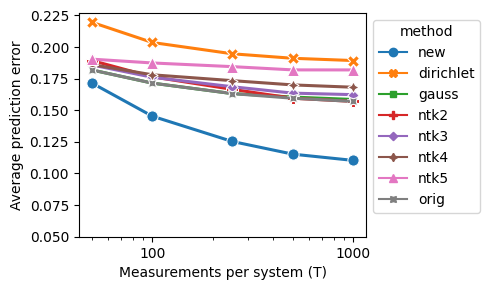

In [21]:
fig=plt.figure(figsize=(5, 3.0))
ax = sns.lineplot(
    data=df[(df['dataname'] == "new") & (df['nrow'] == 9) & (df['qubitdist'] == 1) & (df['nsamples_new'] == 50)],
    x='shadowsize',
    y='avg_test',
    hue='method',
    style='method',
    markers=True,#['o', 'D'],
    dashes=False,
    markersize=8.1,
    linewidth = 2.2,
    #palette=[sns.color_palette("muted")[7], sns.color_palette("Set2")[2]],
    #hue_order=['orig', 'new']
)
sns.move_legend(plt.gca(), loc="upper left", bbox_to_anchor=(1, 1))
plt.xlabel(r'Measurements per system (T)')
plt.ylabel('Average prediction error')
plt.xscale('log')
plt.ylim(0.05, 0.227)
#ax.set_xticks([60, 125, 250, 500, 1000])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.legend([],[], frameon=False)
#     plt.legend(title='', labels=['Previous work', 'Gaussian', r'$\infty$-width NN', 'This work'])
plt.tight_layout()
plt.savefig('shadow-size.png', dpi=300)